
# <span style="color:rgb(213,80,0)">This file is referred to dataset AR regression data</span>

Creates all Figures and tables associated with dataset AR regression data. See Table A.2 in Appendix A to see where this dataset has been used inside the book

## Data loading

In [1]:
close all;
load('multiple_regression.txt');
y=multiple_regression(:,4);
X=multiple_regression(:,1:3);
n=length(y);
prin=0;

## Create Figure 3.1

outLS=fitlm(X,y);



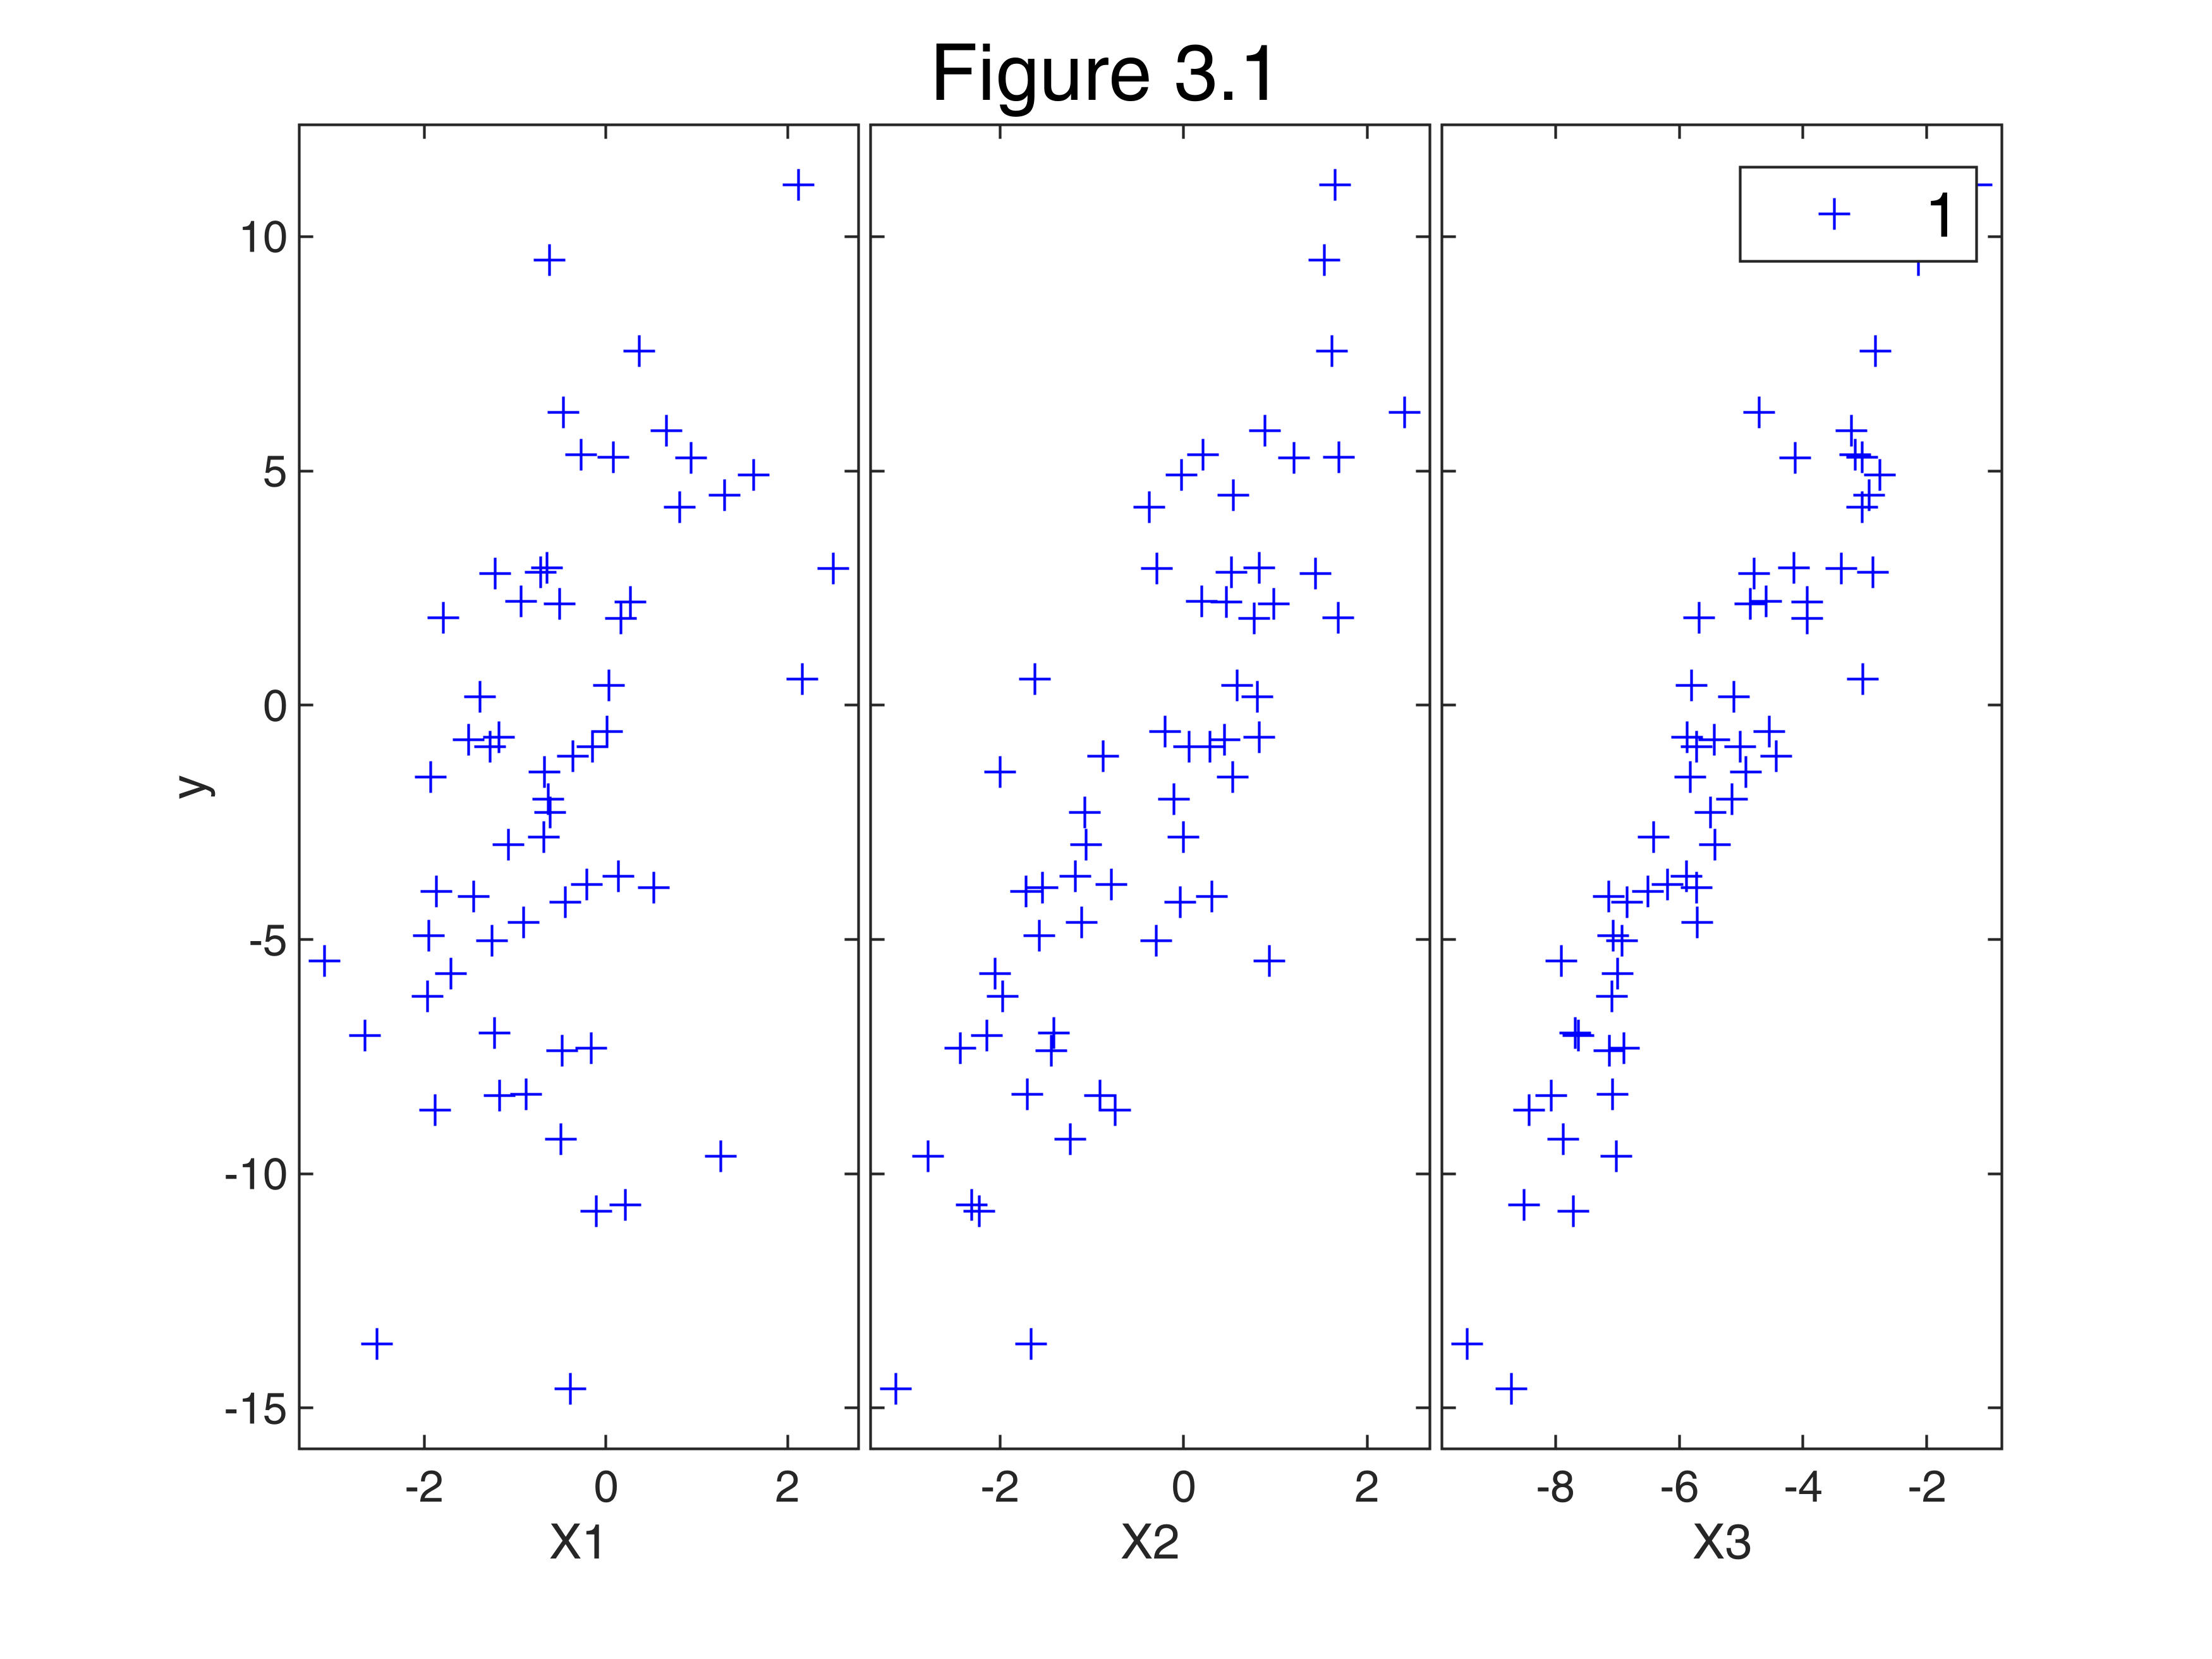

In [2]:
yXplot(y,X);
sgtitle('Figure 3.1')
set(gcf,"Name",'Figure 3.1')

In [3]:

if prin==1
    % print to postscript
    print -depsc AR1.eps;
end

## Create Figure 3.2

In [4]:
outLS=fitlm(X,y);
disp('Traditional ANOVA table based on all the observations')

Traditional ANOVA table based on all the observations

In [5]:
disp(outLS)

Linear regression model:
    y ~ 1 + x1 + x2 + x3
Estimated Coefficients:
                   Estimate      SE       tStat       pValue  
                   ________    _______    ______    __________
    (Intercept)      11.174    0.67501    16.553    3.1288e-23
    x1             -0.21796    0.17244    -1.264       0.21146
    x2               1.4981    0.15534    9.6439    1.6733e-13
    x3               2.2596    0.13668    16.531    3.3265e-23
Number of observations: 60, Error degrees of freedom: 56
Root Mean Squared Error: 1.09
R-squared: 0.965,  Adjusted R-Squared: 0.963
F-statistic vs. constant model: 510, p-value = 1.33e-40


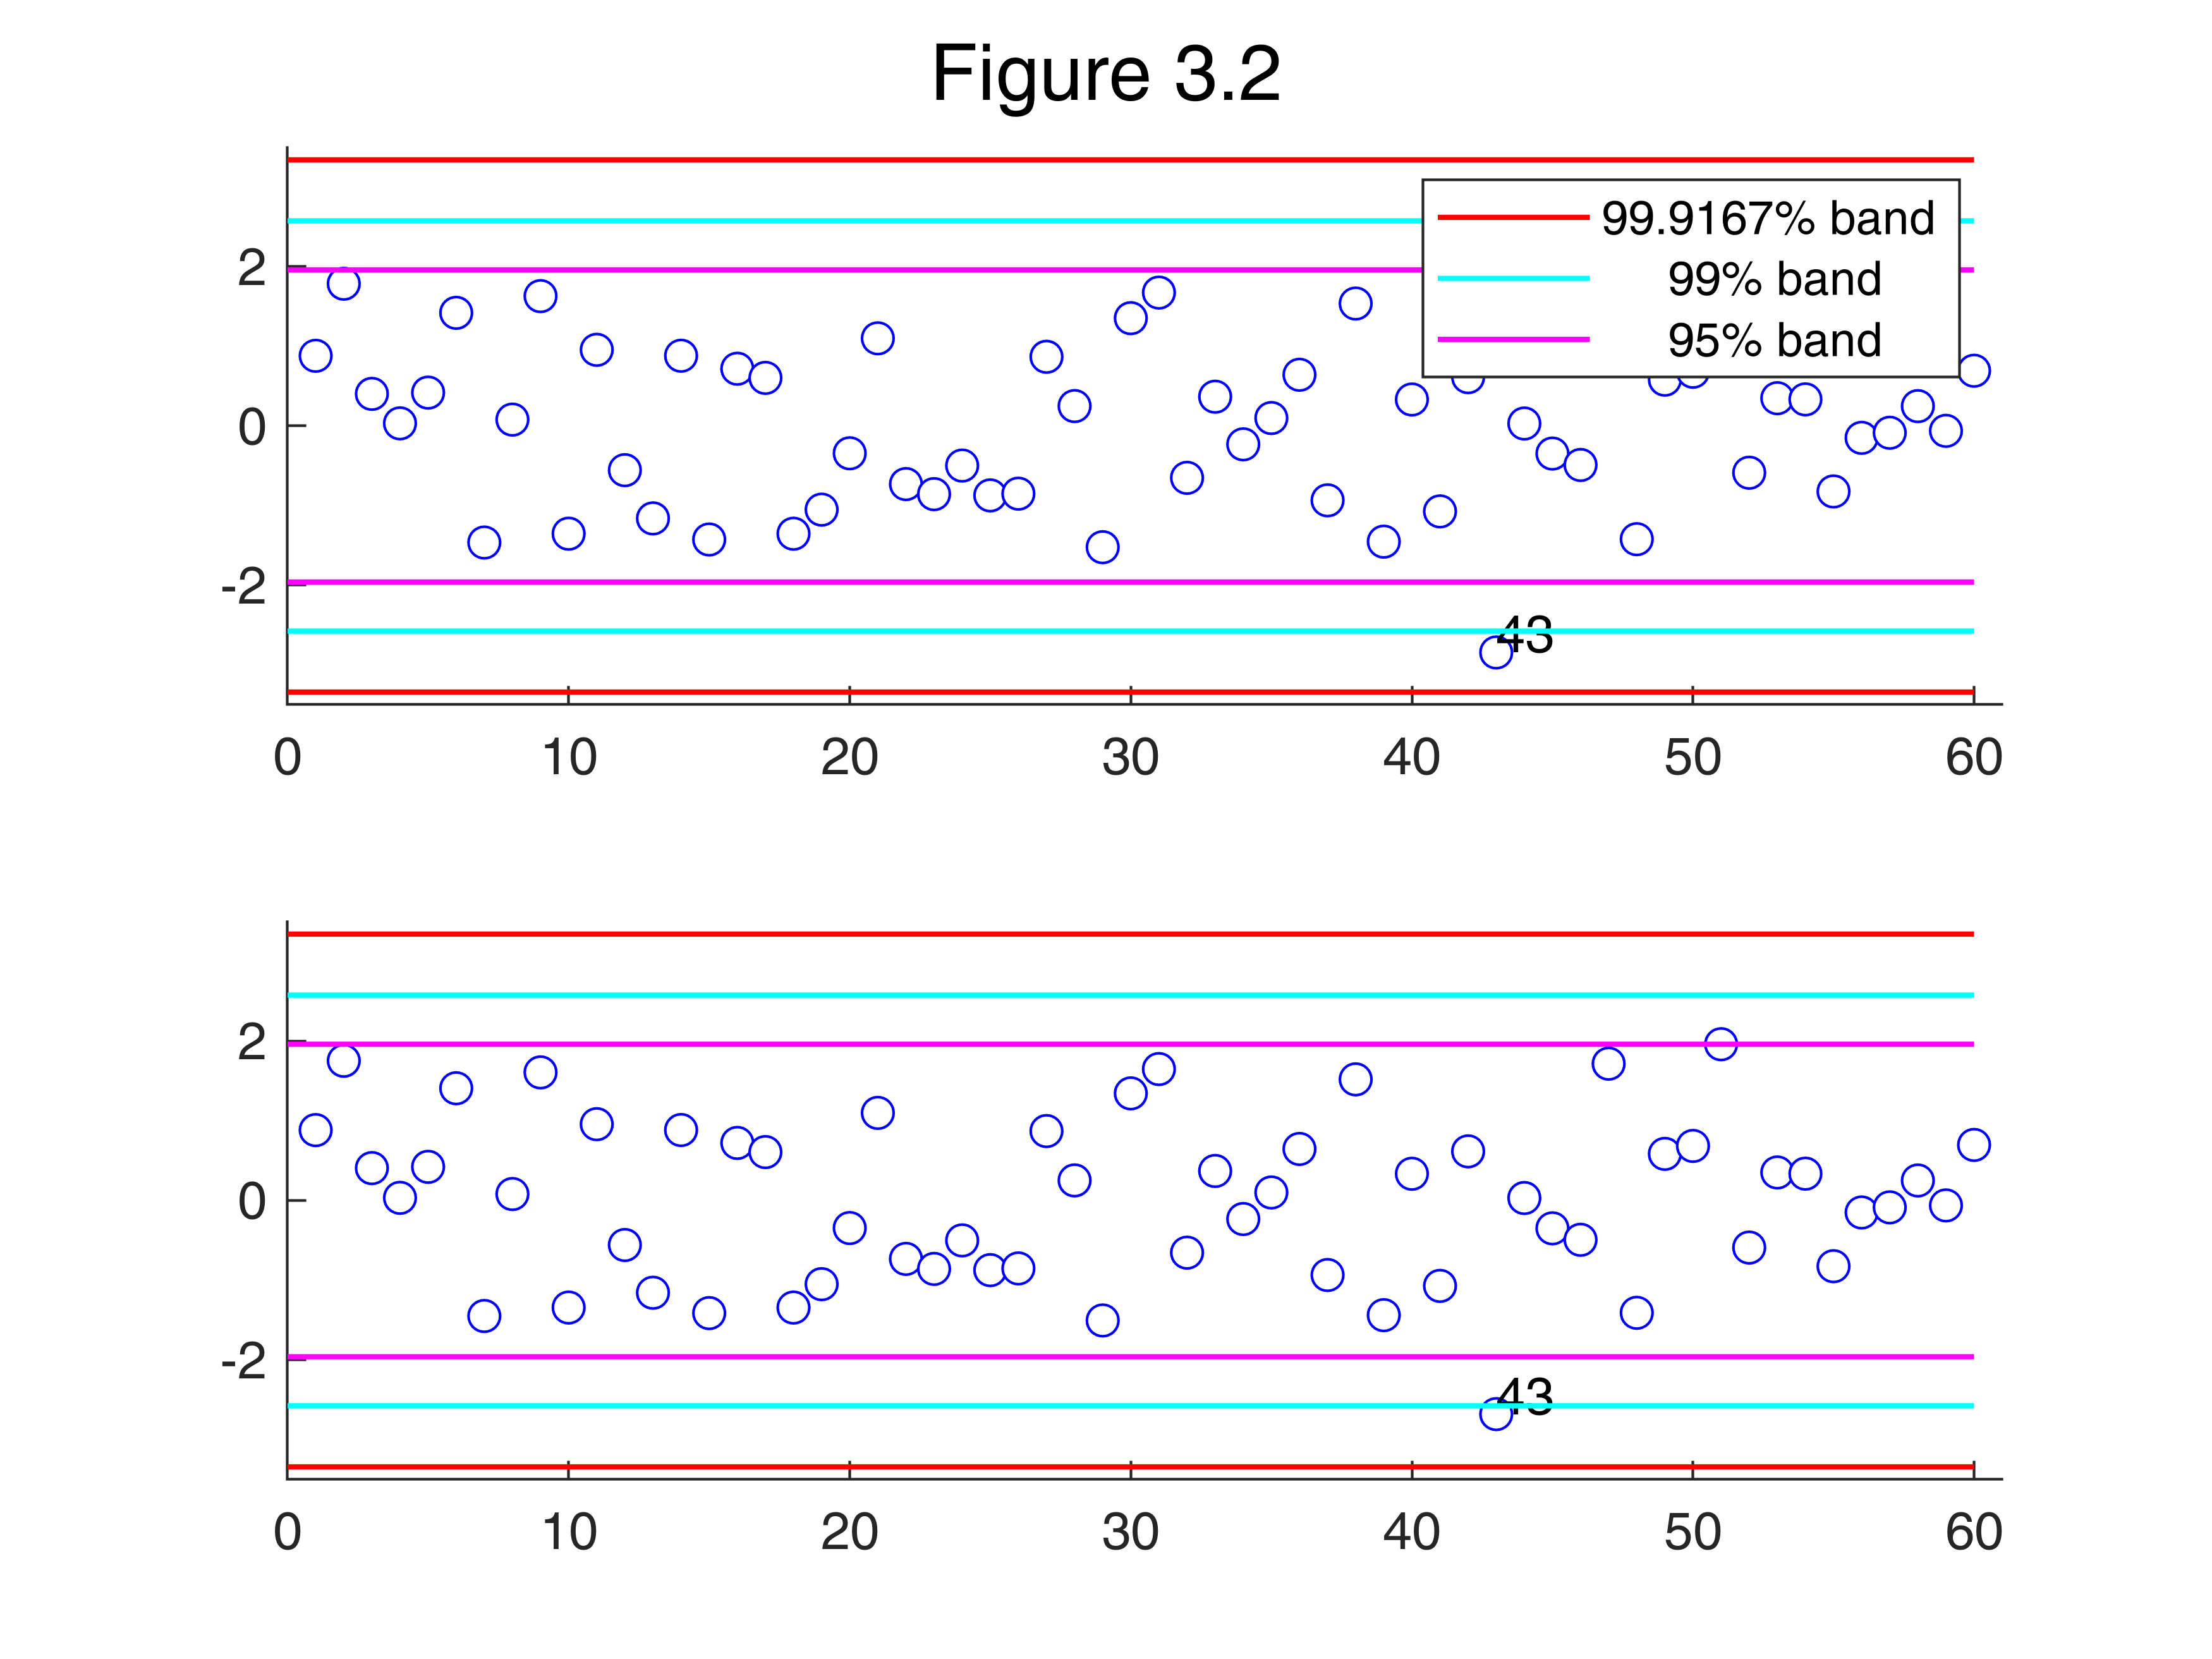

In [6]:
figure
conflev=[0.95 0.99 1-0.05/n];
yl=3.5;
h1=subplot(2,1,1);
resindexplot(outLS.Residuals{:,3},'h',h1,'conflev',conflev,'numlab',{1})
title('')
ylim([-yl yl])
h2=subplot(2,1,2);
resindexplot(outLS.Residuals{:,4},'h',h2,'conflev',conflev,'numlab',{1})
title('')
ylim([-yl yl])

sgtitle('Figure 3.2')
set(gcf,"Name",'Figure 3.2')

In [7]:

if prin==1
    % print to postscript
    print -depsc AR2.eps;
end

## ANOVA table after removing 43

In [8]:
out=fitlm(X,y,'Exclude',43);
disp('Anova table after deleting unit 43')

Anova table after deleting unit 43

In [9]:
disp(out)

Linear regression model:
    y ~ 1 + x1 + x2 + x3
Estimated Coefficients:
                   Estimate      SE        tStat       pValue  
                   ________    _______    _______    __________
    (Intercept)      11.724    0.66472     17.637    2.6658e-24
    x1             -0.32034     0.1664    -1.9251      0.059389
    x2                1.441    0.14773     9.7541    1.3511e-13
    x3               2.3627    0.13378     17.661    2.5023e-24
Number of observations: 59, Error degrees of freedom: 55
Root Mean Squared Error: 1.03
R-squared: 0.969,  Adjusted R-Squared: 0.967
F-statistic vs. constant model: 570, p-value = 2.19e-41

## Create Figure 3.3

qqplot with envelopes + residuals



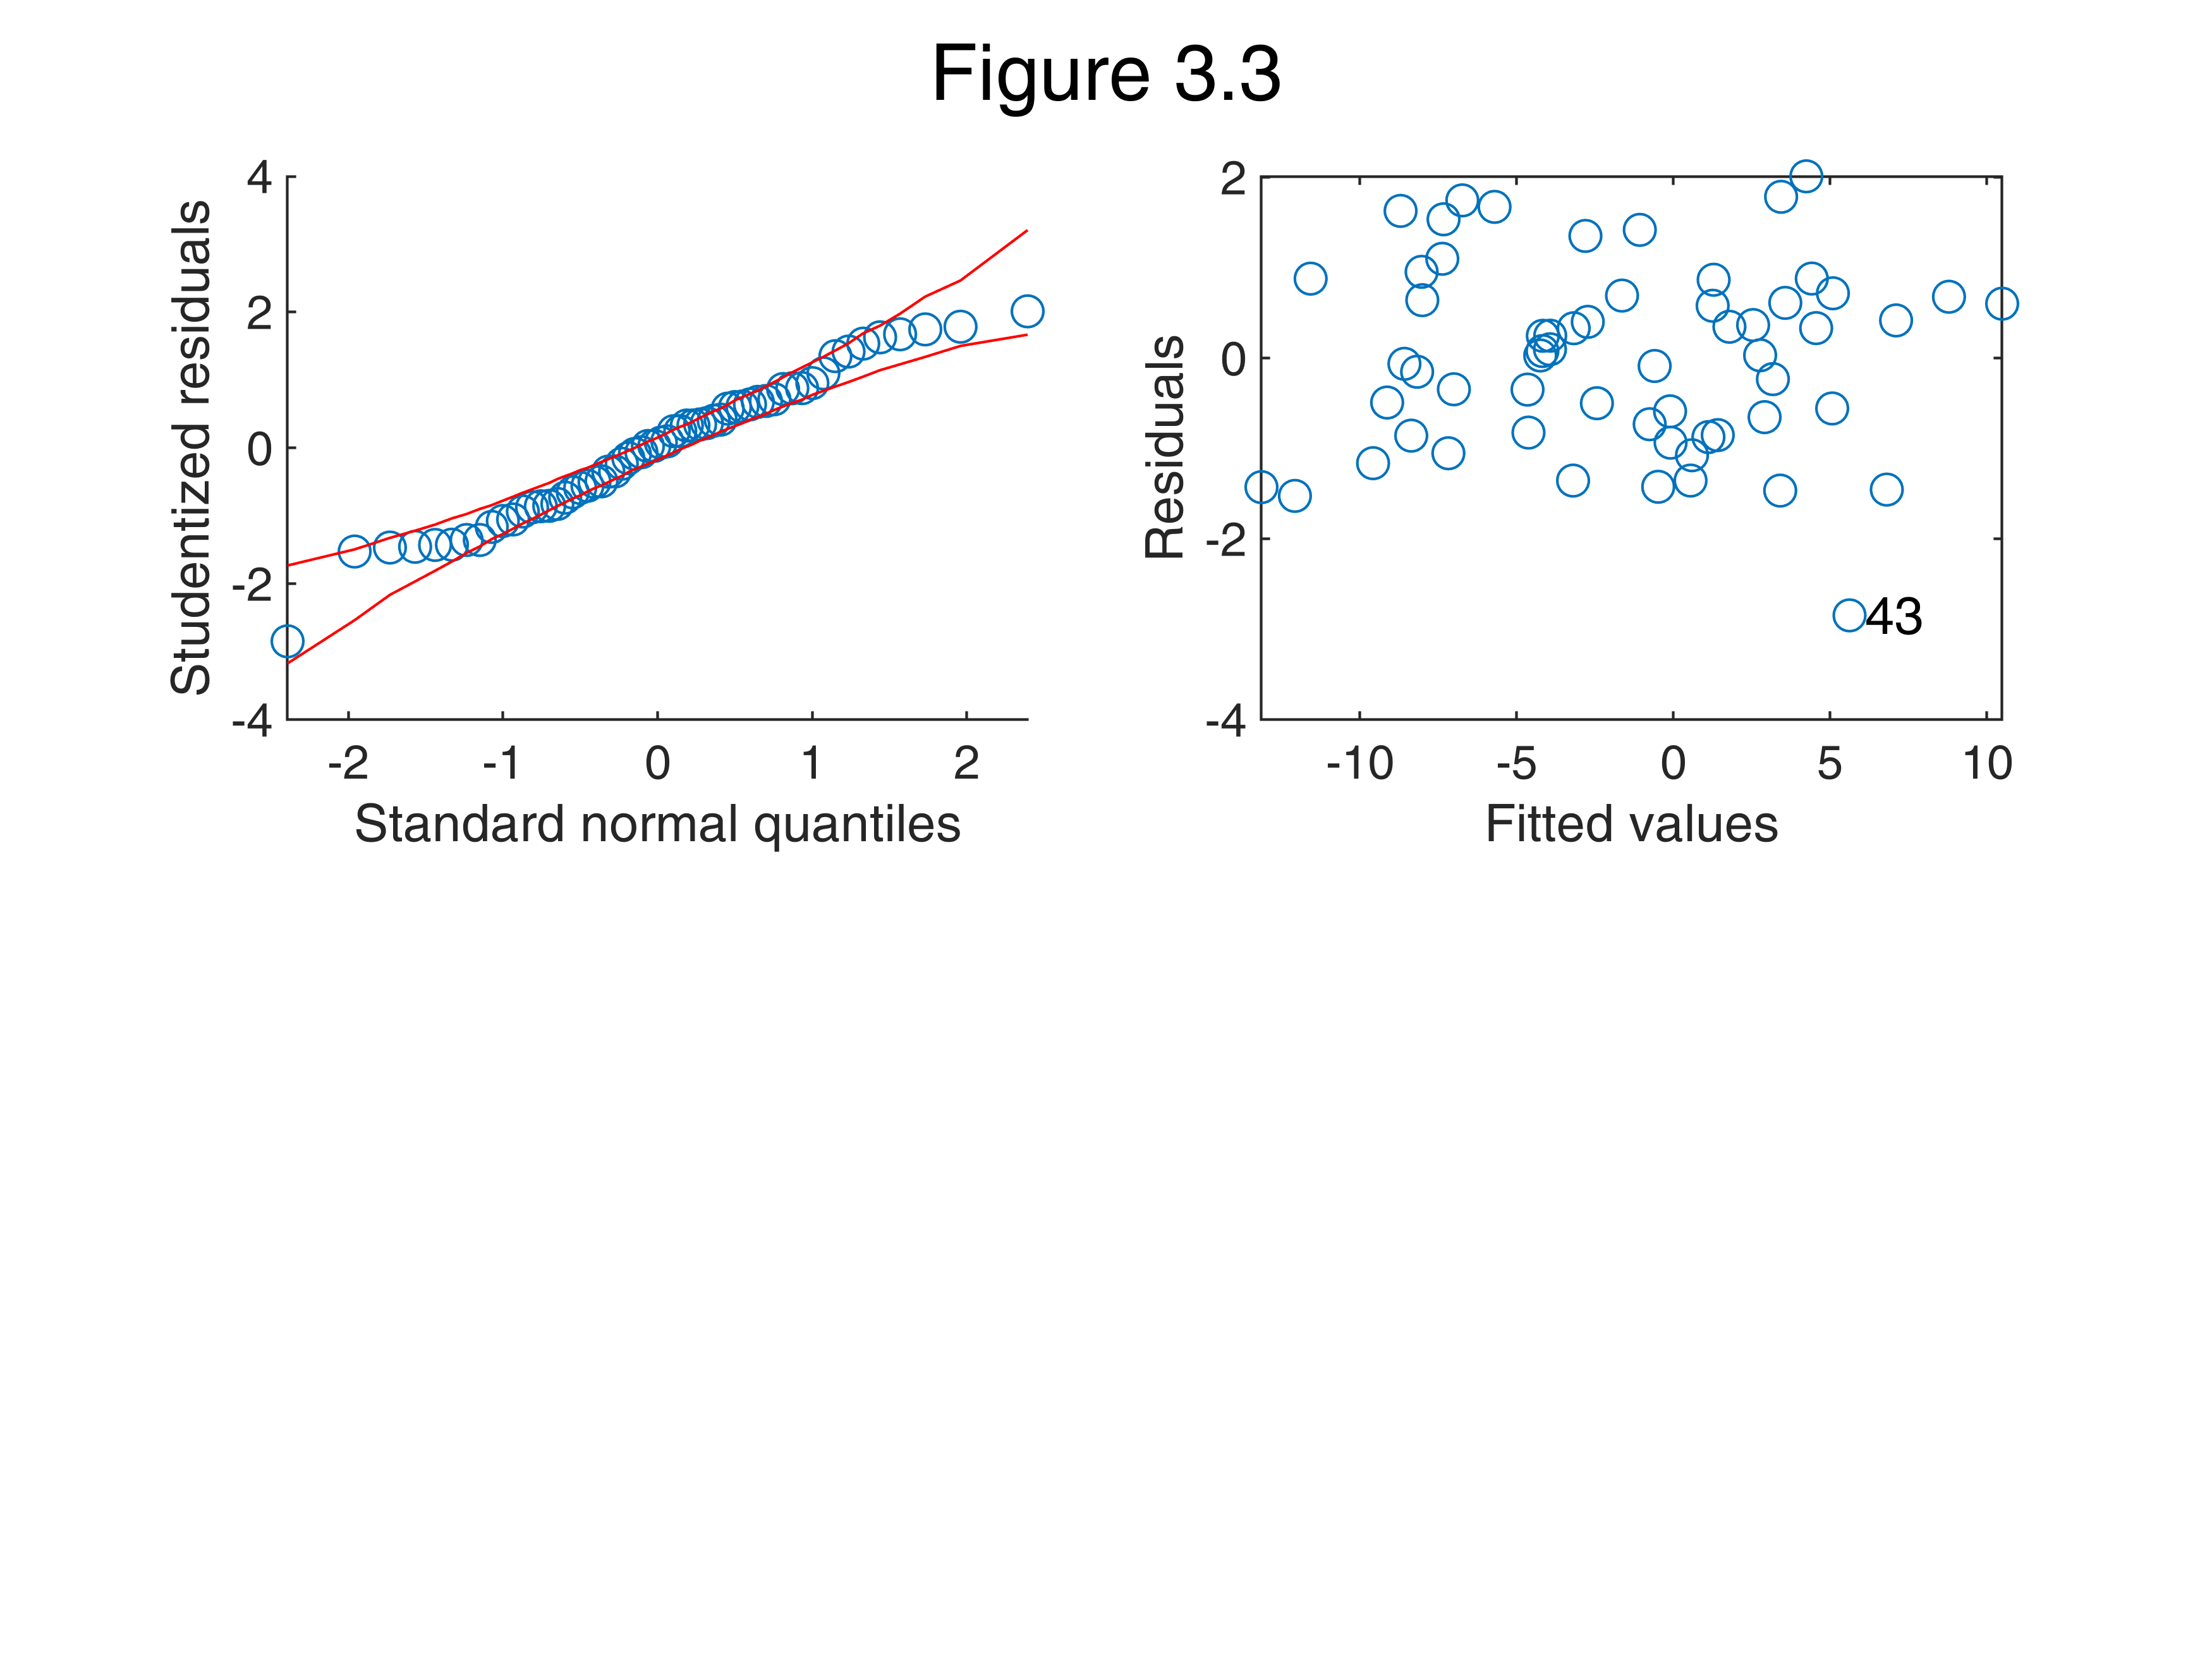

In [10]:
figure
load('multiple_regression.txt');
y=multiple_regression(:,4);
X=multiple_regression(:,1:3);

outLM=fitlm(X,y,'exclude','');
res=outLM.Residuals{:,3};
h1=subplot(2,2,1);
qqplotFS(res,'X',X,'plots',1,'h',h1);
% title('qqplot of stud. res.')

subplot(2,2,2);
plot(outLM.Fitted,res,'o')
sel=43;
text(outLM.Fitted(sel)+0.5,res(sel),num2str(sel))
xlabel('Fitted values')
ylabel('Residuals')

sgtitle('Figure 3.3')
set(gcf,"Name",'Figure 3.3')

In [11]:

if prin==1
    % print to postscript
    print -depsc AR3.eps;
end

## Create Figure 3.4:

Added variable plot to show the importance of units 9 21 30 31 38 47



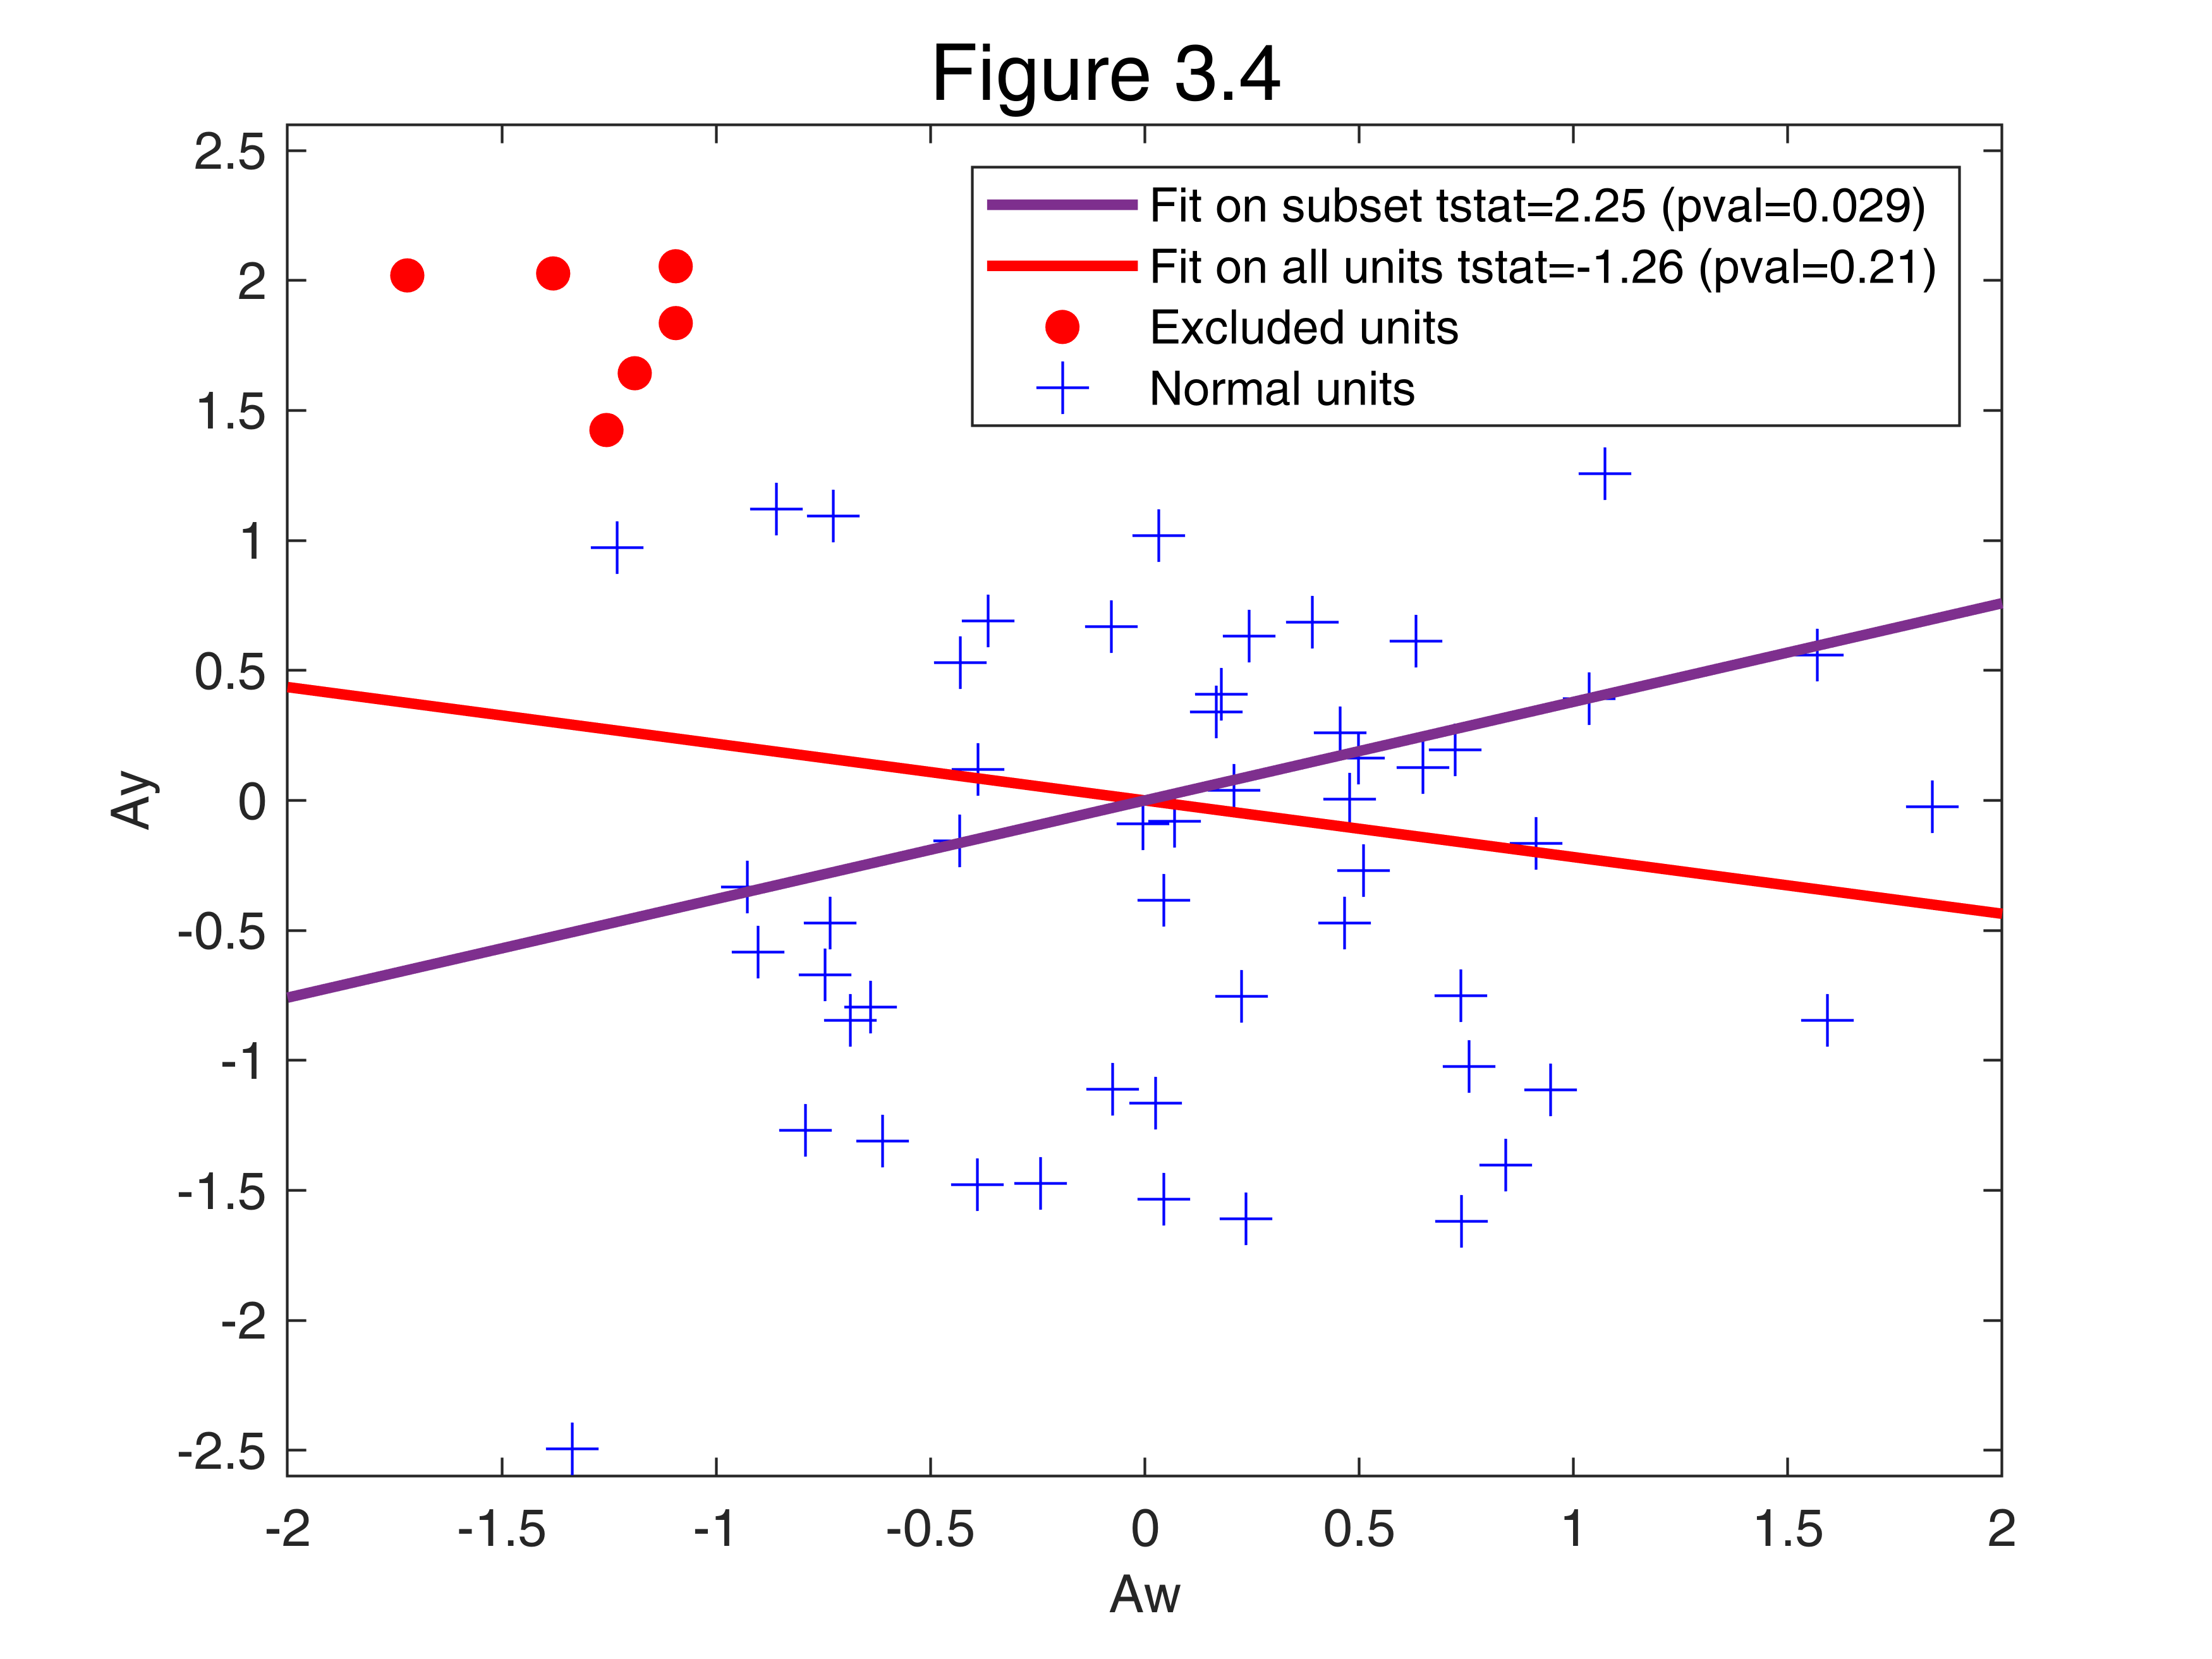

In [12]:
% Computes in a new plot the added variable plot with and without the
% outliers
figure;
% Set Font Size for the title
fsiztitl=10;
% Set Font Size for the labels on the axes
SizeAxesNum=10;
outADD=addt(y,X(:,2:3),X(:,1),'plots',1,'units',[9 21 30 31 38 47]','textlab','y','FontSize',fsiztitl,'SizeAxesNum',SizeAxesNum);
ylim([-2.6 2.6])

sgtitle('Figure 3.4')
set(gcf,"Name",'Figure 3.4')

In [13]:

if prin==1
    % print to postscript
    print -depsc AR4.eps;
end

## Create Figure 3.5

Compute the added variable plot with and without unit 43



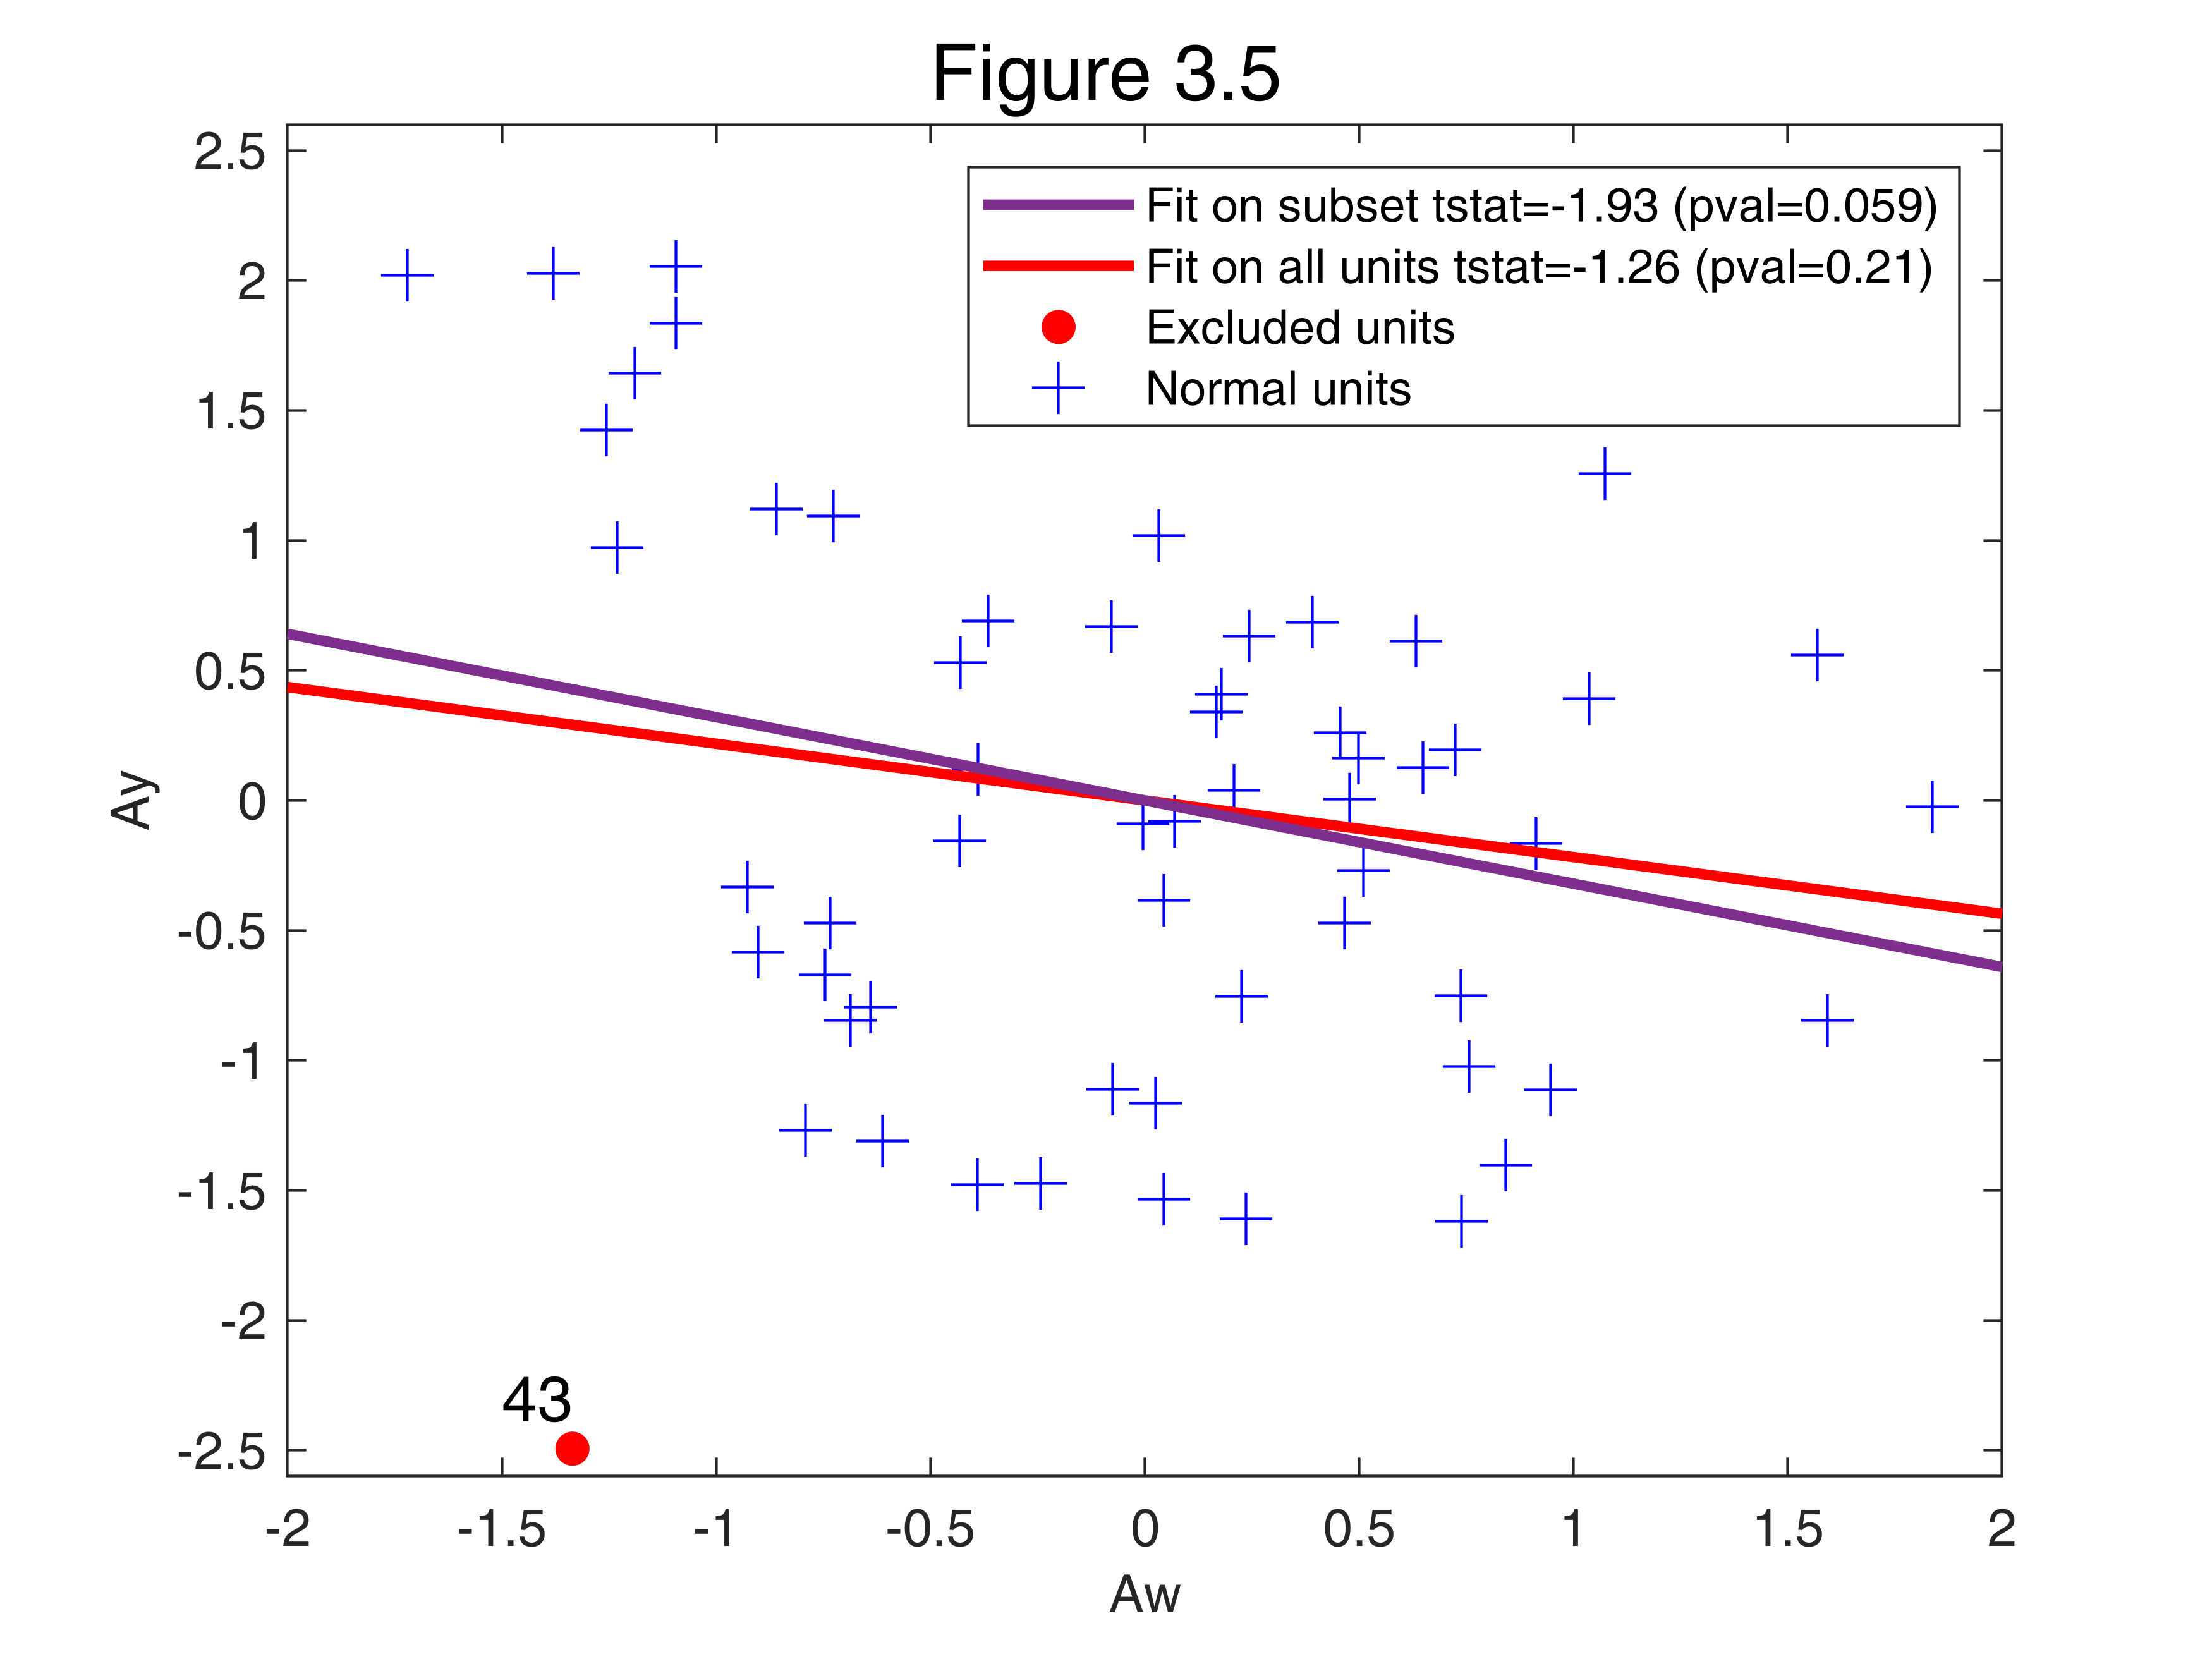

In [14]:
figure;
out43=addt(y,X(:,2:3),X(:,1),'plots',1,'units',43','textlab','y','FontSize',fsiztitl,'SizeAxesNum',SizeAxesNum);
text(-1.5,-2.3,'43','FontSize',12)
ylim([-2.6 2.6])
sgtitle('Figure 3.5')
set(gcf,"Name",'Figure 3.5')

In [15]:

if prin==1
    % print to postscript
    print -depsc AR5.eps;
end

## Create Figure 3.8

Traditional robust analysis based on S estimators S estimators with 2 values of breakdown point


In [16]:
conflev=[0.95 0.99];
% Note that the pattern of residuals changes completely
% Using bdp=0.5 the outliers are correctly found, on the other hand using
% bdp=0.25 the masking effect is clear
figure;
h1=subplot(2,1,1);
bdp=0.25;
[out]=Sreg(y,X,'nsamp',3000,'bdp',bdp);

Total estimated time to complete S estimate:  0.45 seconds

In [17]:
resindexplot(out,'h',h1,'conflev',conflev);
ylabel(['Breakdown point =' num2str(bdp)])
h2=subplot(2,1,2);
bdp=0.5;
[out]=Sreg(y,X,'nsamp',3000,'bdp',bdp);

Total estimated time to complete S estimate:  0.22 seconds


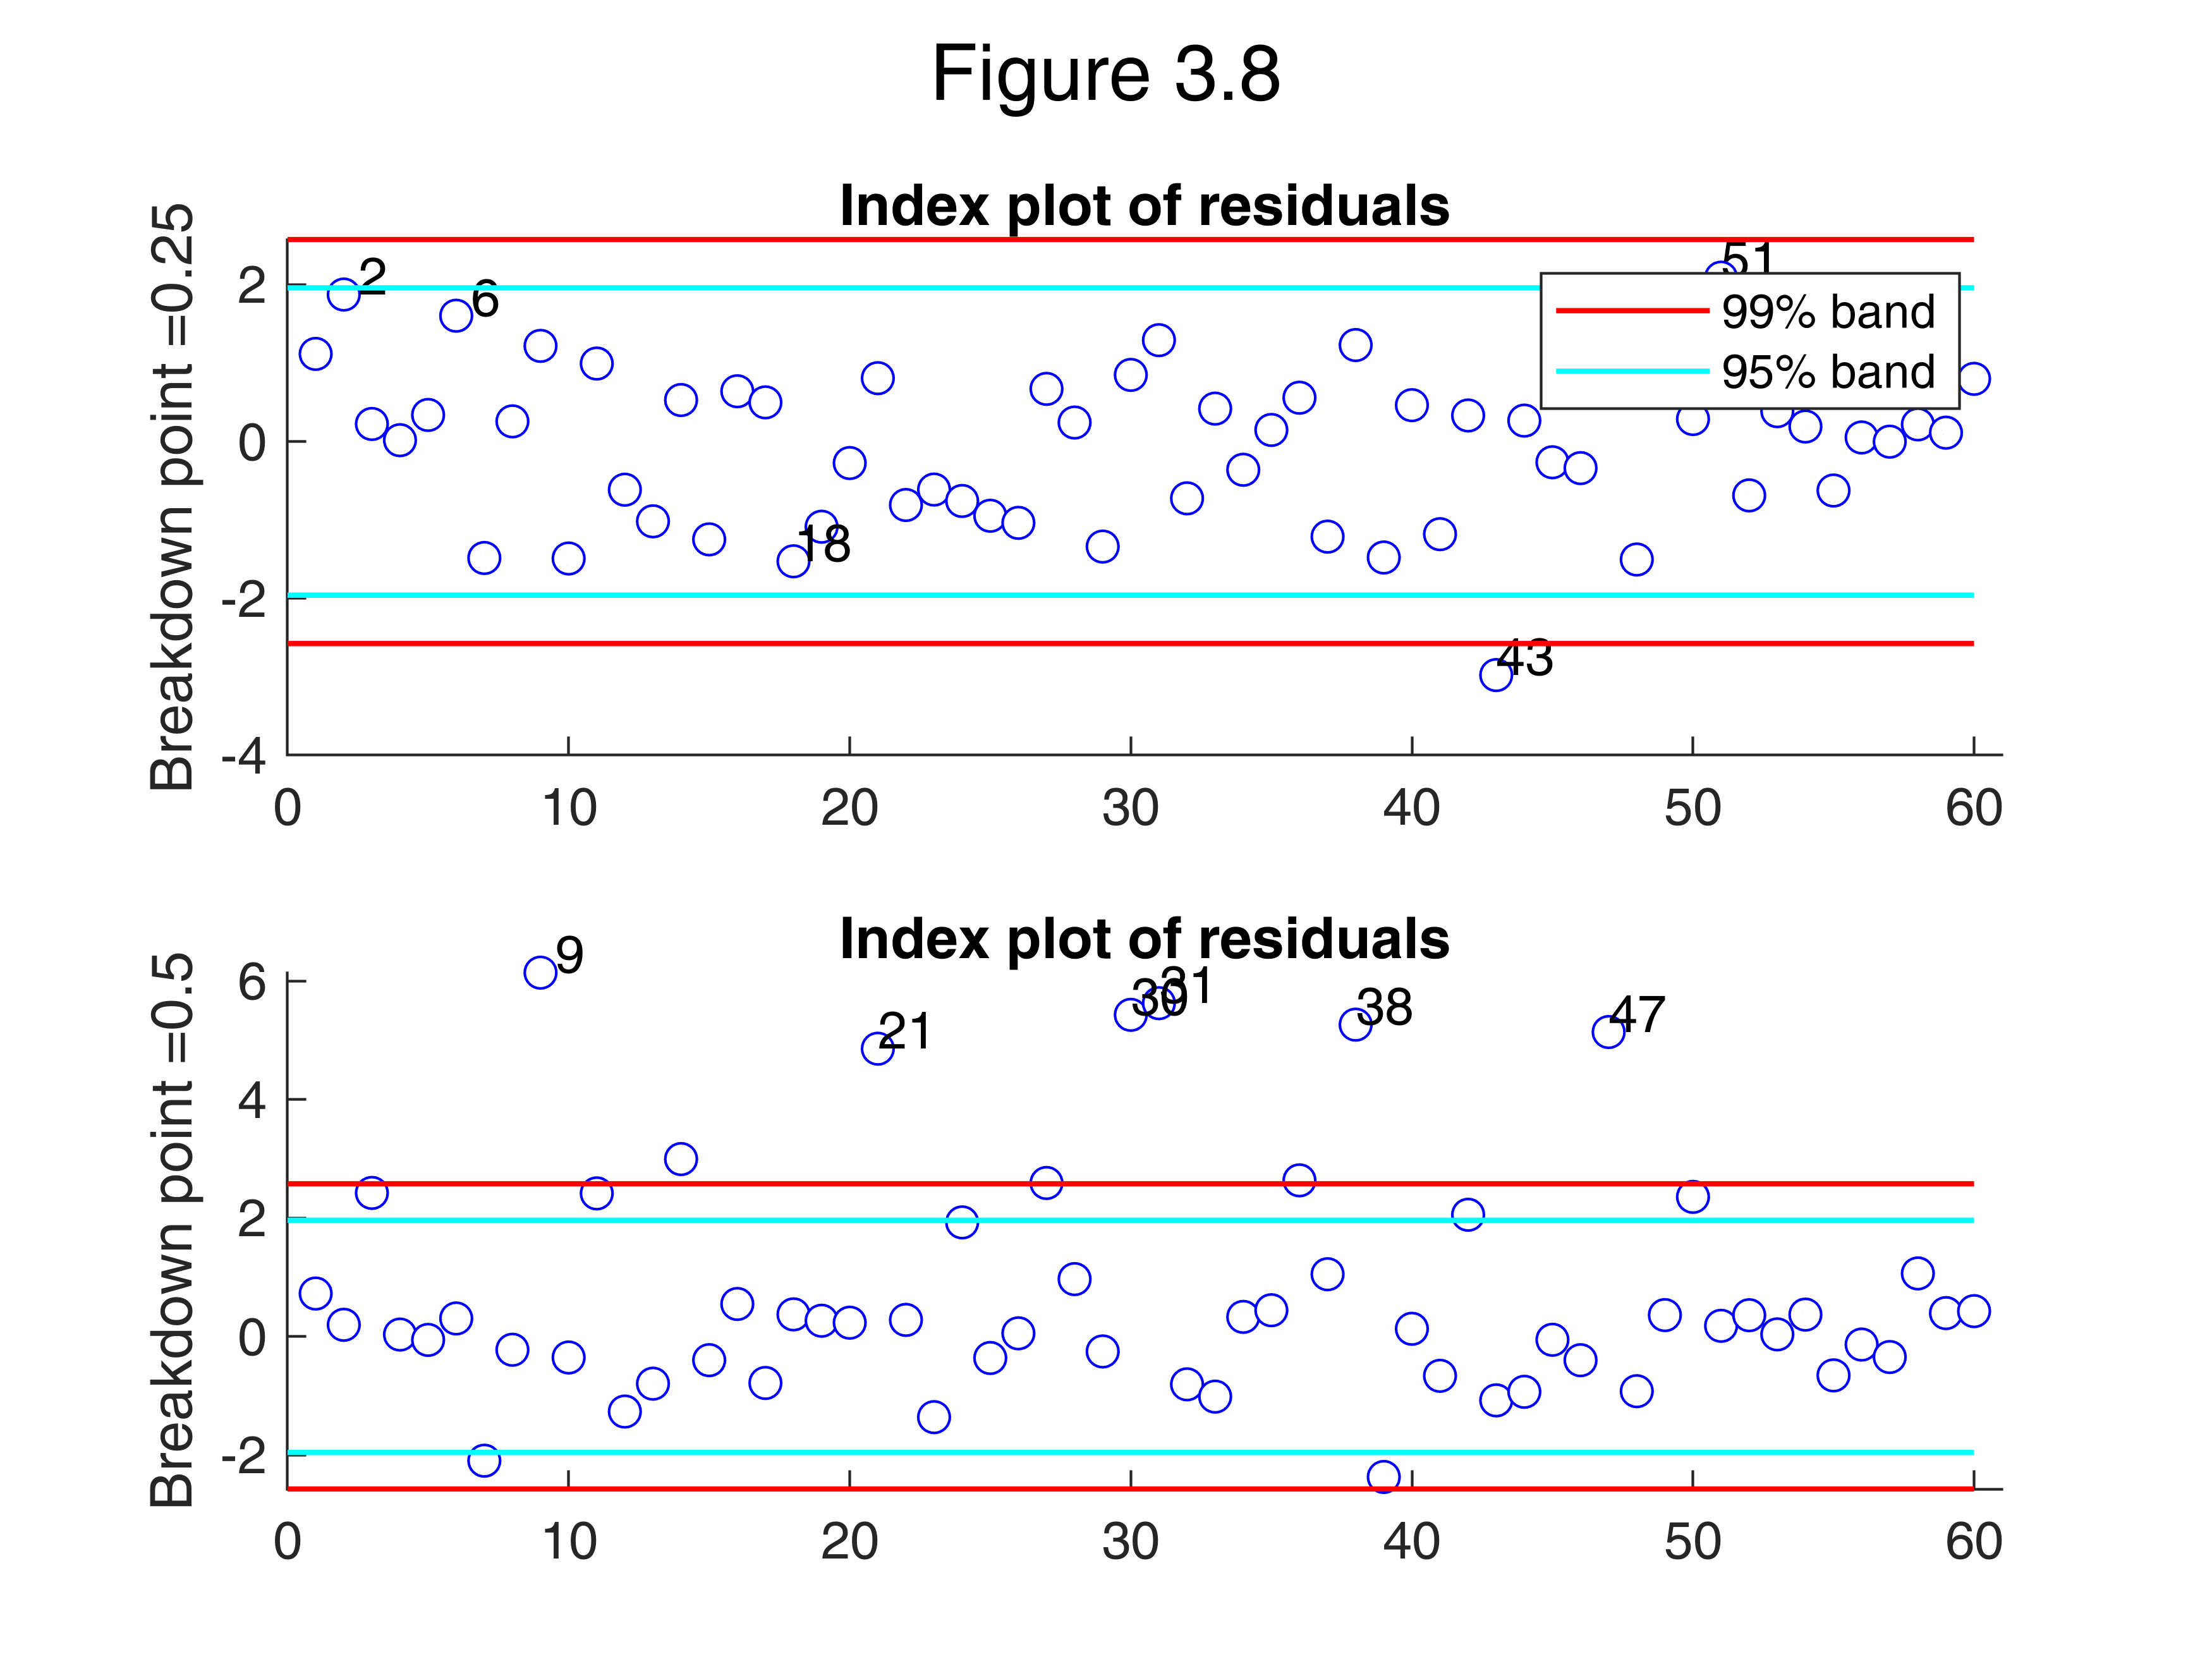

In [18]:
resindexplot(out,'h',h2,'conflev',conflev,'numlab',{6});
ylabel(['Breakdown point =' num2str(bdp)])

sgtitle('Figure 3.8')
set(gcf,"Name",'Figure 3.8')

In [19]:

if prin==1
    % print to postscript
    print -depsc ARtradrobS.eps;
end

## Create Figure 3.9
## MR: (Multiple regression data): MM estimators with 2 values of efficiency

In [20]:
% MMreg using two different level of efficiency
conflev=[0.95 0.99];
% Note that the pattern of residuals changes completely
% Using eff=0.90 the outliers are correctly found, on the other hand using
% eff=0.95 the masking effect is clear
figure;
h1=subplot(2,1,1);
eff=0.90;
[out]=MMreg(y,X,'Snsamp',3000,'eff',eff);

Total estimated time to complete S estimate:  0.76 seconds

In [21]:
resindexplot(out,'h',h1,'conflev',conflev,'numlab',{6});
ylabel(['Eff.=' num2str(eff)])
h2=subplot(2,1,2);
eff=0.95;
[out]=MMreg(y,X,'Snsamp',3000,'eff',eff);

Total estimated time to complete S estimate:  0.68 seconds


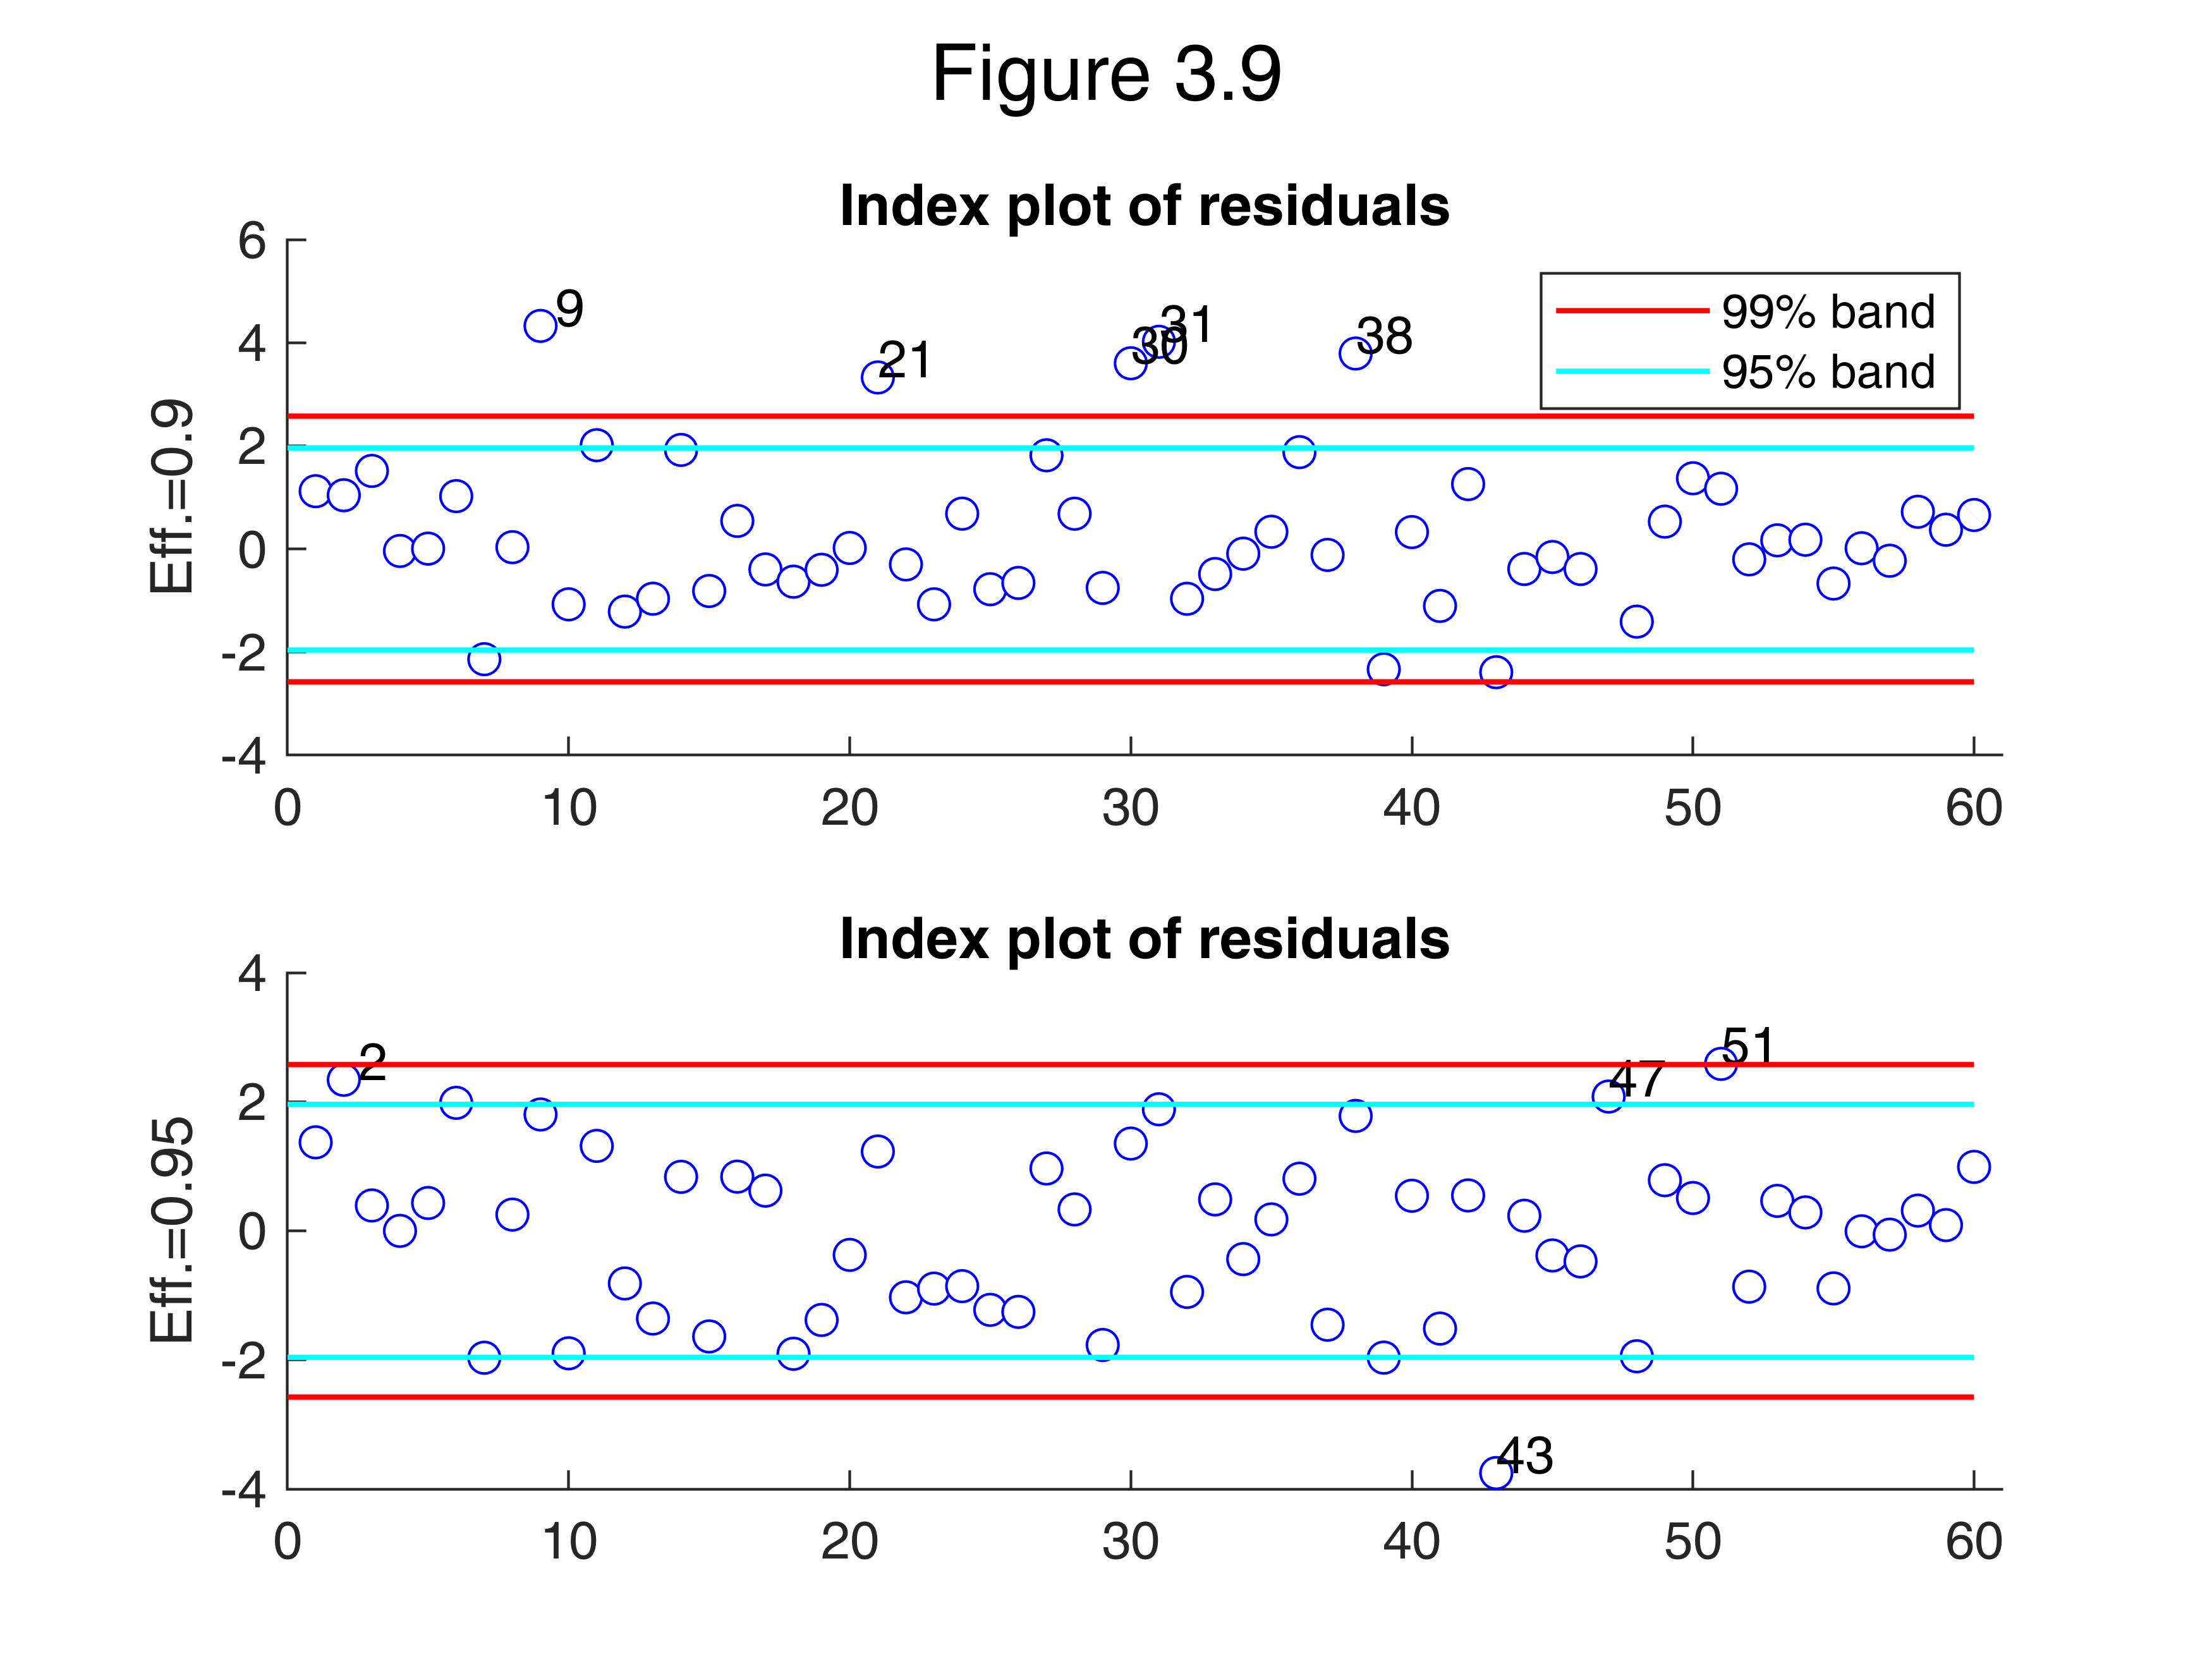

In [22]:
resindexplot(out,'h',h2,'conflev',conflev,'numlab',{4});
ylabel(['Eff.=' num2str(eff)])
sgtitle('Figure 3.9')
set(gcf,"Name",'Figure 3.9')

In [23]:

if prin==1
    % print to postscript
    print -depsc ARtradrobMM.eps;
end

## Create Figure 4.15

Forward EDA rescaled t stat monitoring


In [24]:
showtit=false;

% LMS using 10000 subsamples
[out]=LXS(y,X,'nsamp',10000);

Total estimated time to complete LMS:  0.03 seconds


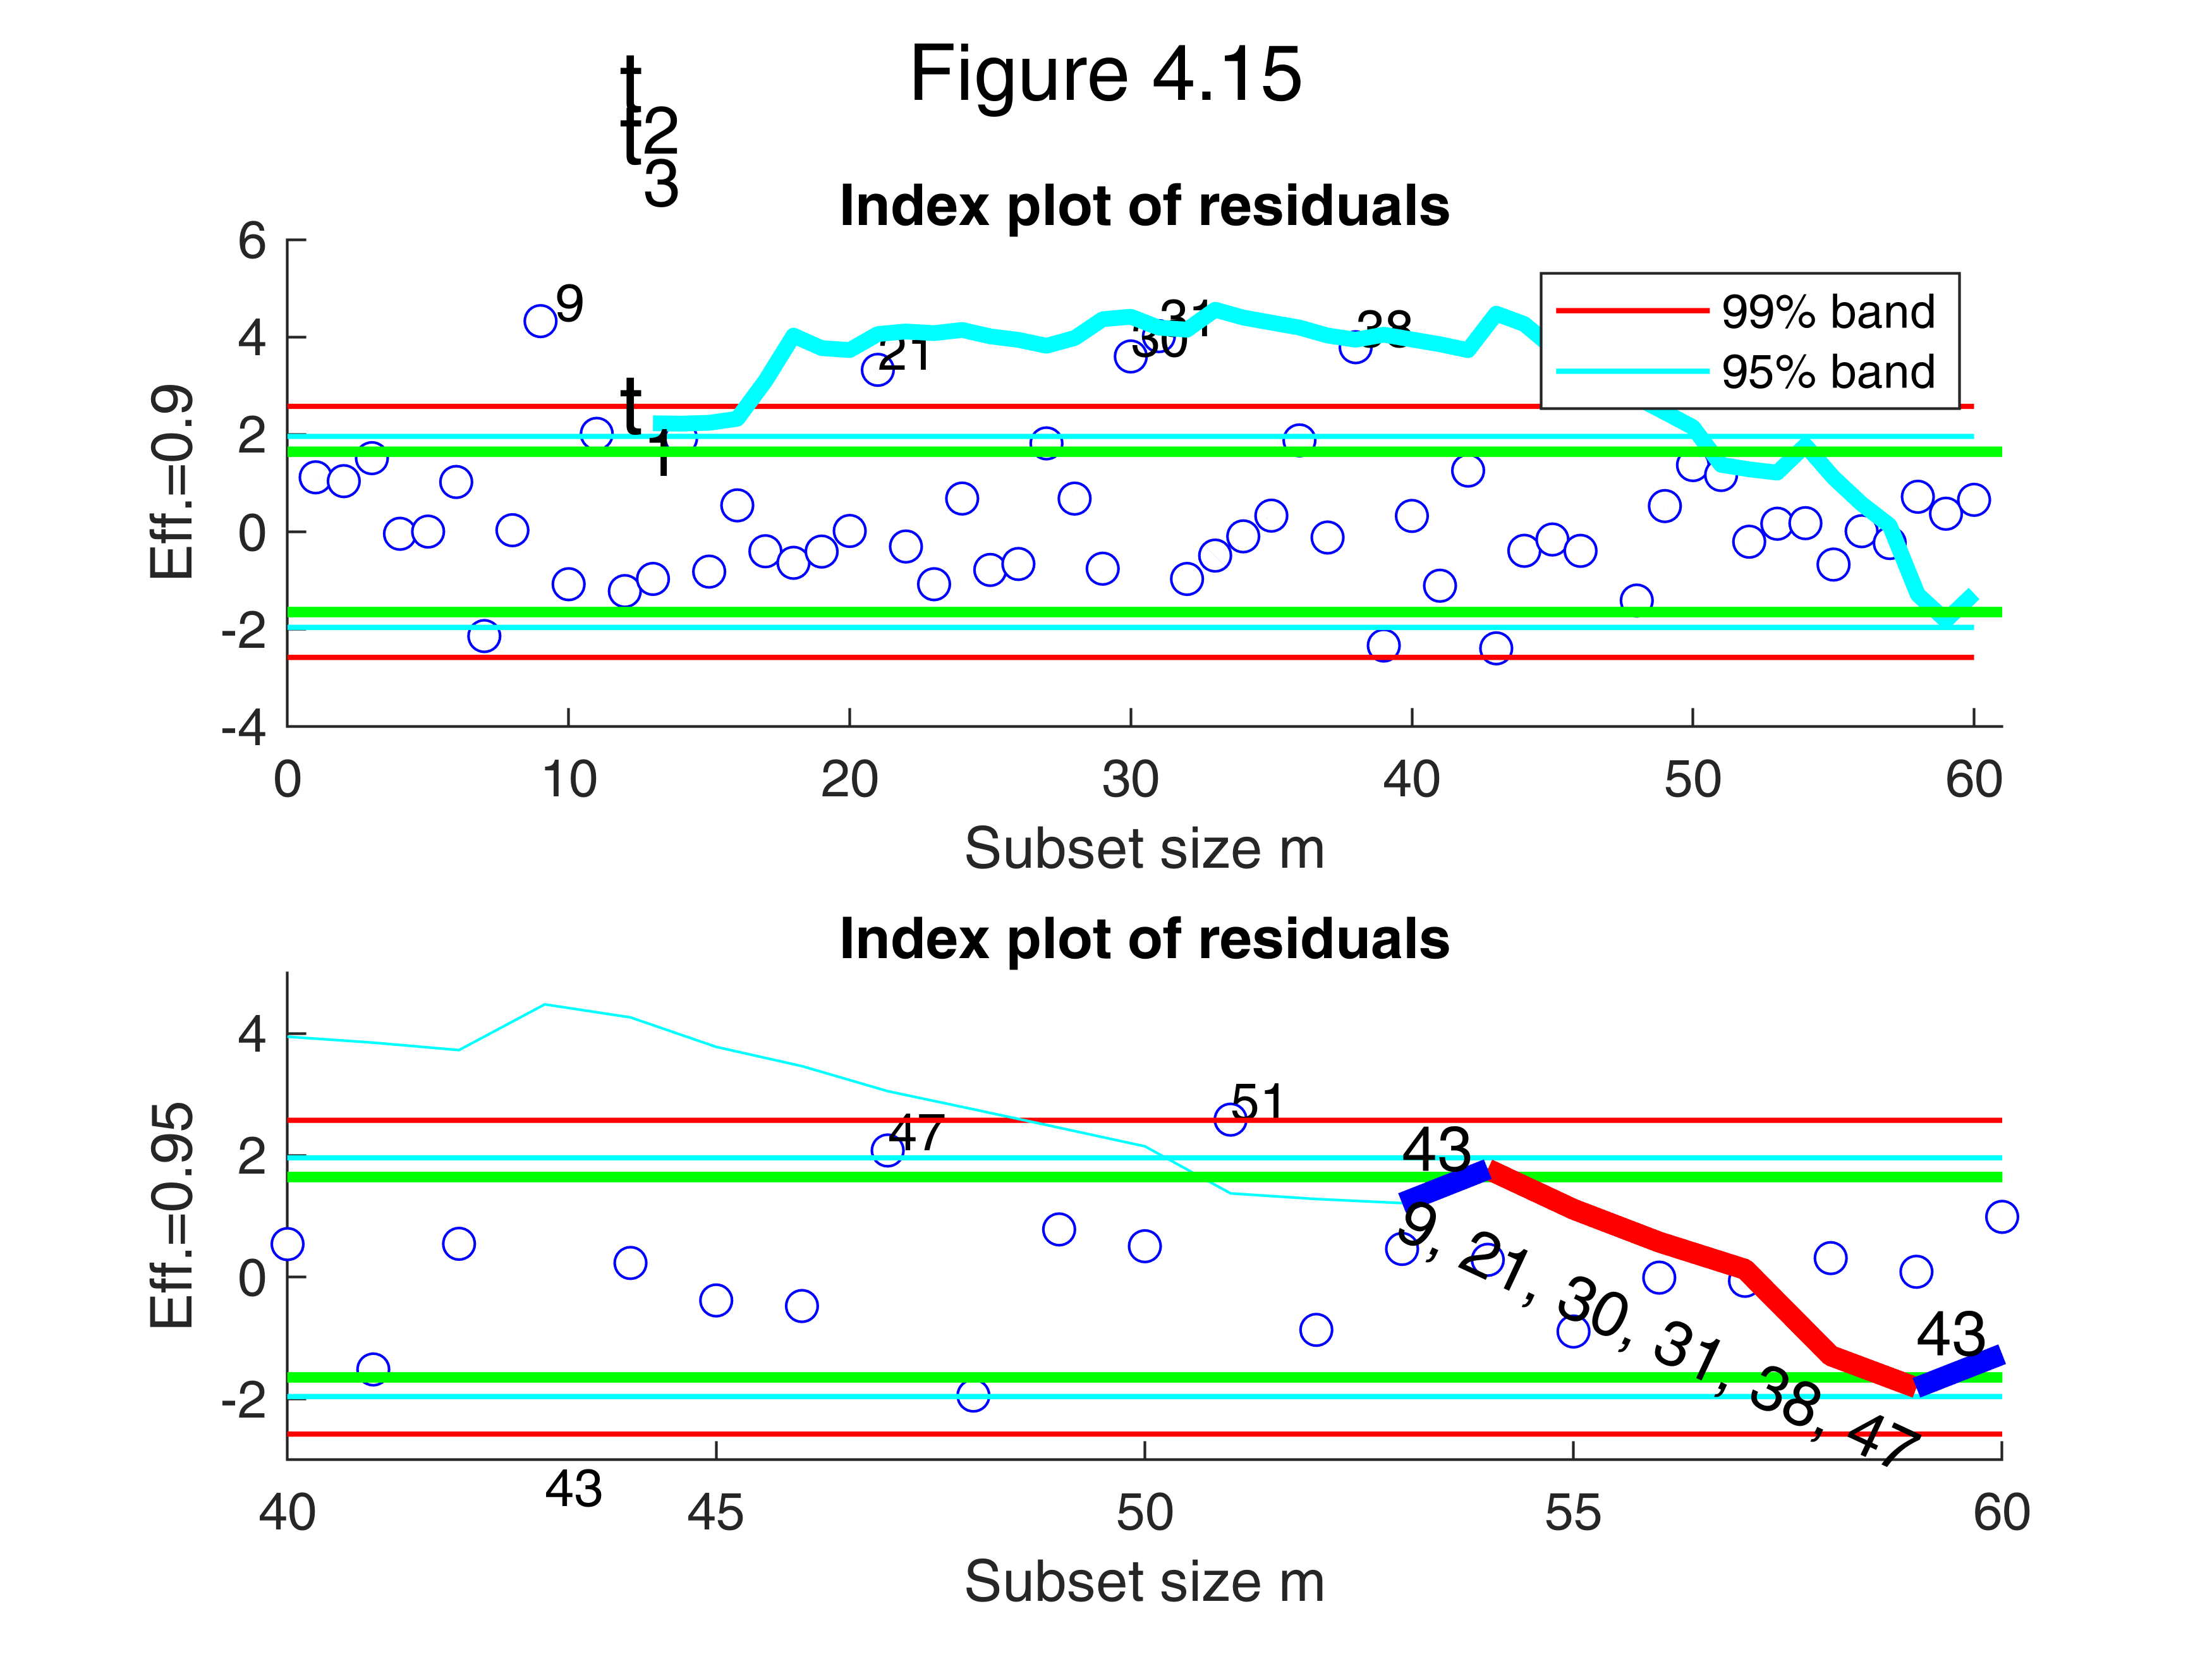

In [25]:
% Forward Search
[out]=FSReda(y,X,out.bs);
nr=2;
nc=1;
subplot(nr,nc,1)
hold('on');
plot(out.Tols(:,1),out.Tols(:,3:end),'LineWidth',3)
for j=3:5
    tj=['t_' num2str(j-2)];
    text(out.Tols(1,1)-1.2,out.Tols(1,j),tj,'FontSize',16)

end

quant=norminv(0.95);
v=axis;
lwdenv=2;
line([v(1),v(2)],[quant,quant],'color','g','LineWidth',lwdenv);
line([v(1),v(2)],[-quant,-quant],'color','g','LineWidth',lwdenv);
% plot(out.Tols(end-6:end-1,1),out.Tols(end-6:end-1,3),'LineWidth',4,'color','r')
if showtit==true
title('Monitoring of t-stat','FontSize',14);
end
xlabel('Subset size m');

subplot(2,1,2)
% MR: monitoring of t-stat with zoom for first variable
hold('on');
plot(out.Tols(:,1),out.Tols(:,3:end))
ylim([-3 5]);
v=axis;
lwdenv=2;
line([v(1),v(2)],[quant,quant],'color','g','LineWidth',lwdenv);
line([v(1),v(2)],[-quant,-quant],'color','g','LineWidth',lwdenv);
plot(out.Tols(end-6:end-1,1),out.Tols(end-6:end-1,3),'LineWidth',4,'color','r')
if showtit==true
title('Monitoring of t-stat for first variable');
end
xlabel('Subset size m');
plot(out.Tols(end-7:end-6,1),out.Tols(end-7:end-6,3),'LineWidth',4,'color','b')
plot(out.Tols(end-1:end,1),out.Tols(end-1:end,3),'LineWidth',4,'color','b')
text(out.Tols(end-7,1),out.Tols(end-7,3)+0.9,'43','FontSize',12);
text(out.Tols(end-1,1),out.Tols(end-1,3)+0.9,'43','FontSize',12);
%annotation(gcf,'textarrow',[0.54 0.68],...
%    [0.28 0.44],'TextEdgeColor','none');
text(53,1,'9, 21, 30, 31, 38, 47','FontSize',12,'Rotation',-25);
xlim([40 60])

sgtitle('Figure 4.15')
set(gcf,"Name",'Figure 4.15')

In [26]:

if prin==1
    % print to postscript
    print -depsc ARtmonitor.eps;
end

## Prepare input for Figures 4.16-4.18

In [27]:
disp('Monitoring S regression estimators')

Monitoring S regression estimators

In [28]:
outPD=Sregeda(y,X,'plots',0,'rhofunc','mdpd','msg',0);
outOPT=Sregeda(y,X,'plots',0,'rhofunc','optimal','covrob',0,'msg',0);
outHA=Sregeda(y,X,'plots',0,'rhofunc','hampel','msg',0);
outHYP=Sregeda(y,X,'plots',0,'rhofunc','hyperbolic','msg',0);
outOPT1=Sregeda(y,X,'plots',0,'rhofunc','optimal','covrob',1,'msg',0);

fground=struct;
sel=[ 9 21 30 31 38 47    3 11 14 24 27 36 42 50 43  7 39 ]';
fground.funit=sel;
fground.FontSize=1;

LineStyle=[ repmat({'-.'},6,1); repmat({'--'},9,1); repmat({':'},2,1)];
Color= [ repmat({'r'},6,1); repmat({'k'},9,1); repmat({'b'},2,1)];
fground.Color=Color;  % different colors for different foreground trajectories
fground.LineWidth=3;
fground.LineStyle=LineStyle;
standard=struct;
% Fix ylim of the plots below
standard.ylim=[-3 7];

## Create Figure 4.16


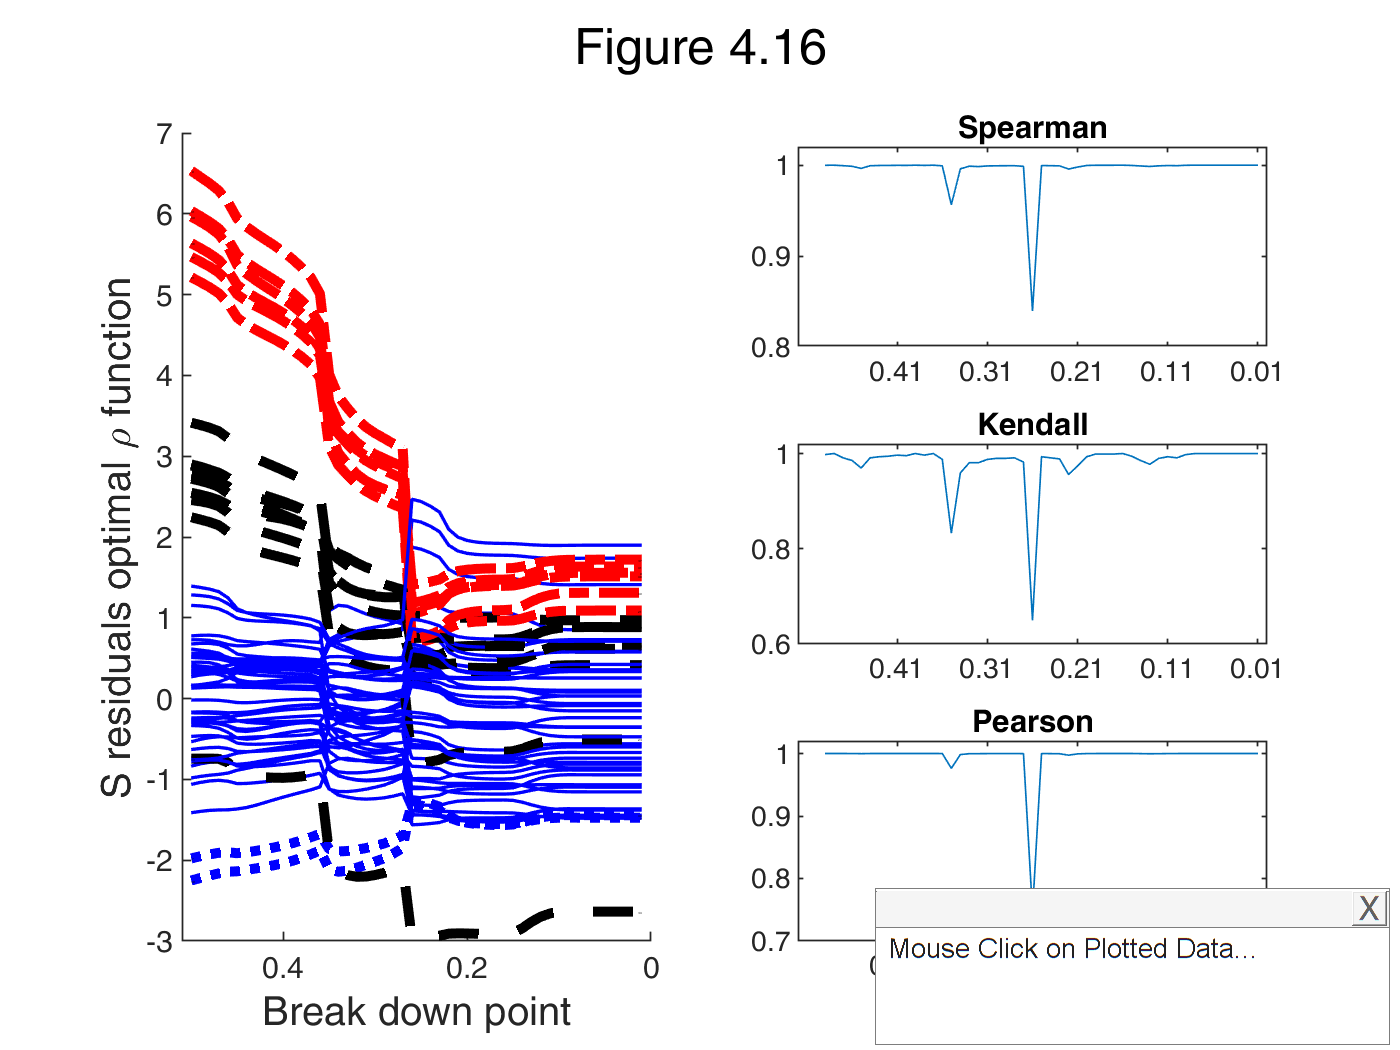

In [29]:
standard.laby='S residuals optimal \rho function';
resfwdplot(outOPT,'fground',fground,'tag','pl_OPT', ...
    'corres',true,'standard',standard);
sgtitle('Figure 4.16')
set(gcf,"Name",'Figure 4.16')

## Create left-hand panel of Figure 4.17


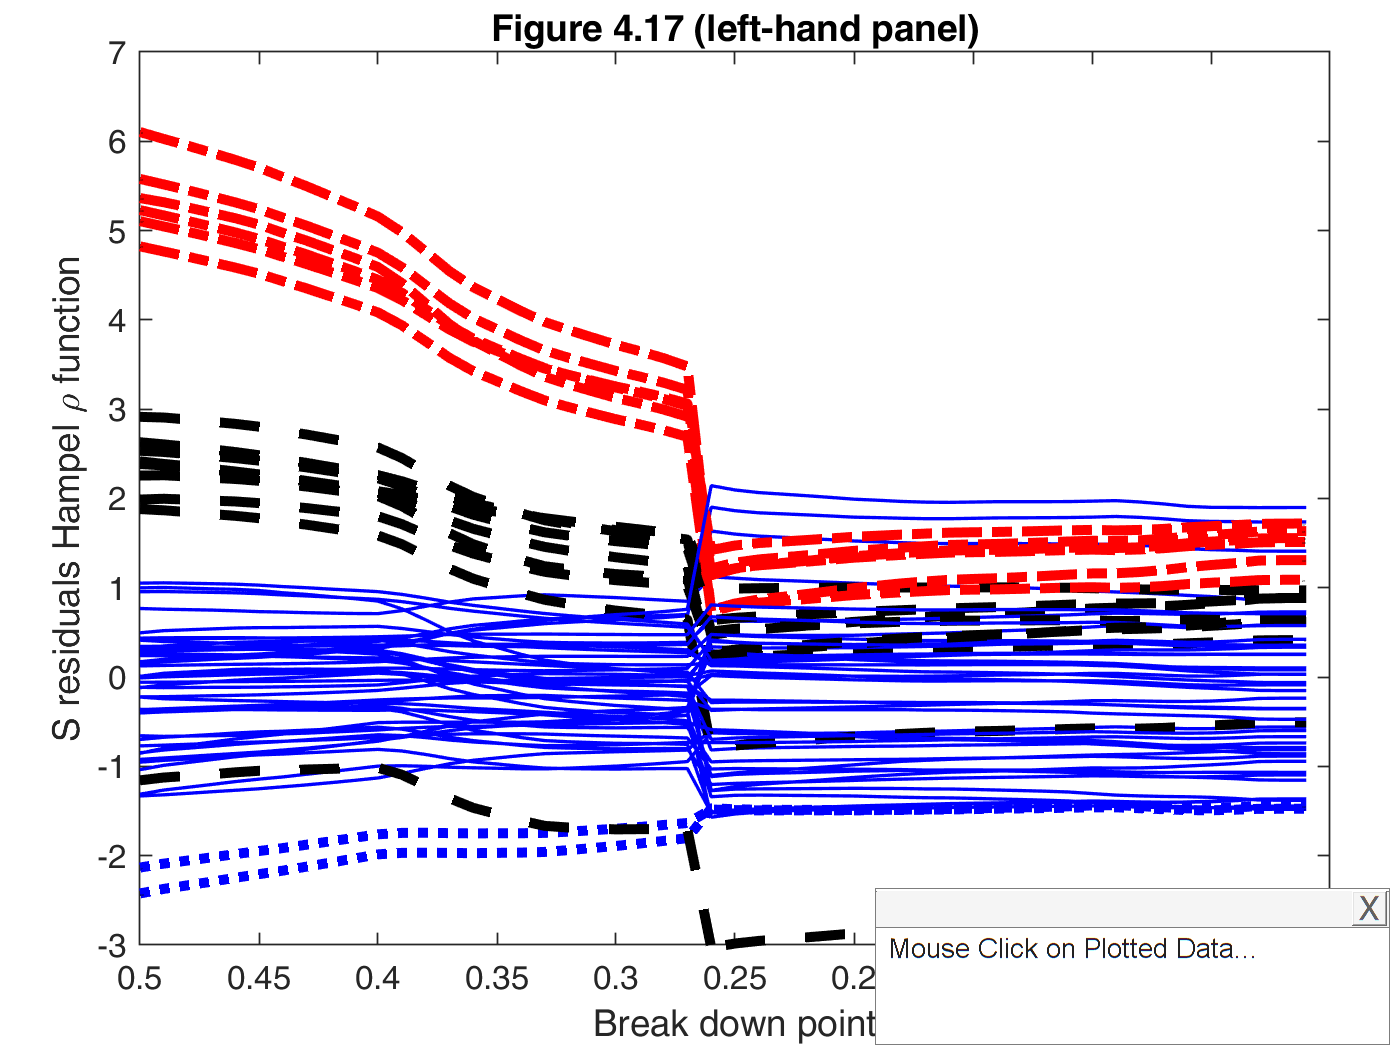

In [30]:
standard.laby='S residuals Hampel \rho function';
resfwdplot(outHA,'fground',fground,'tag','pl_HA', ...
    'corres',false,'standard',standard);
title('Figure 4.17 (left-hand panel)')
set(gcf,"Name",'Figure 4.17 (left-hand panel)')

## Create right-hand panel of Figure 4.17


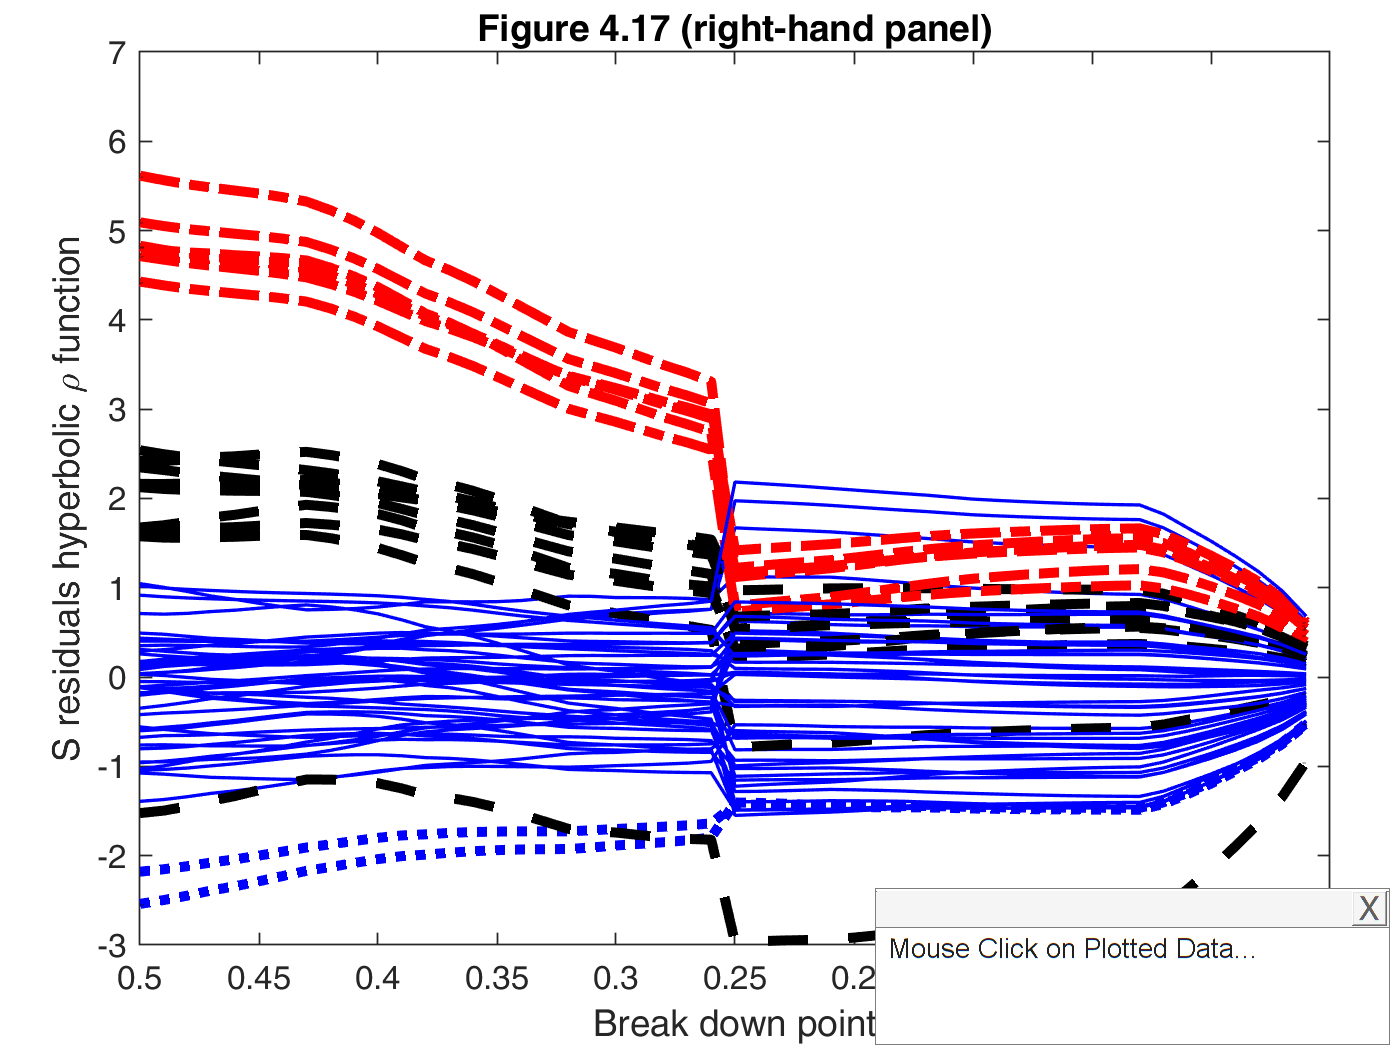

In [31]:
standard.laby='S residuals hyperbolic \rho function';
resfwdplot(outHYP,'fground',fground,'tag','pl_HYP', ...
    'corres',false,'standard',standard);
title('Figure 4.17 (right-hand panel)')
set(gcf,"Name",'Figure 4.17 (right-hand panel)')

## Create Figure 4.18


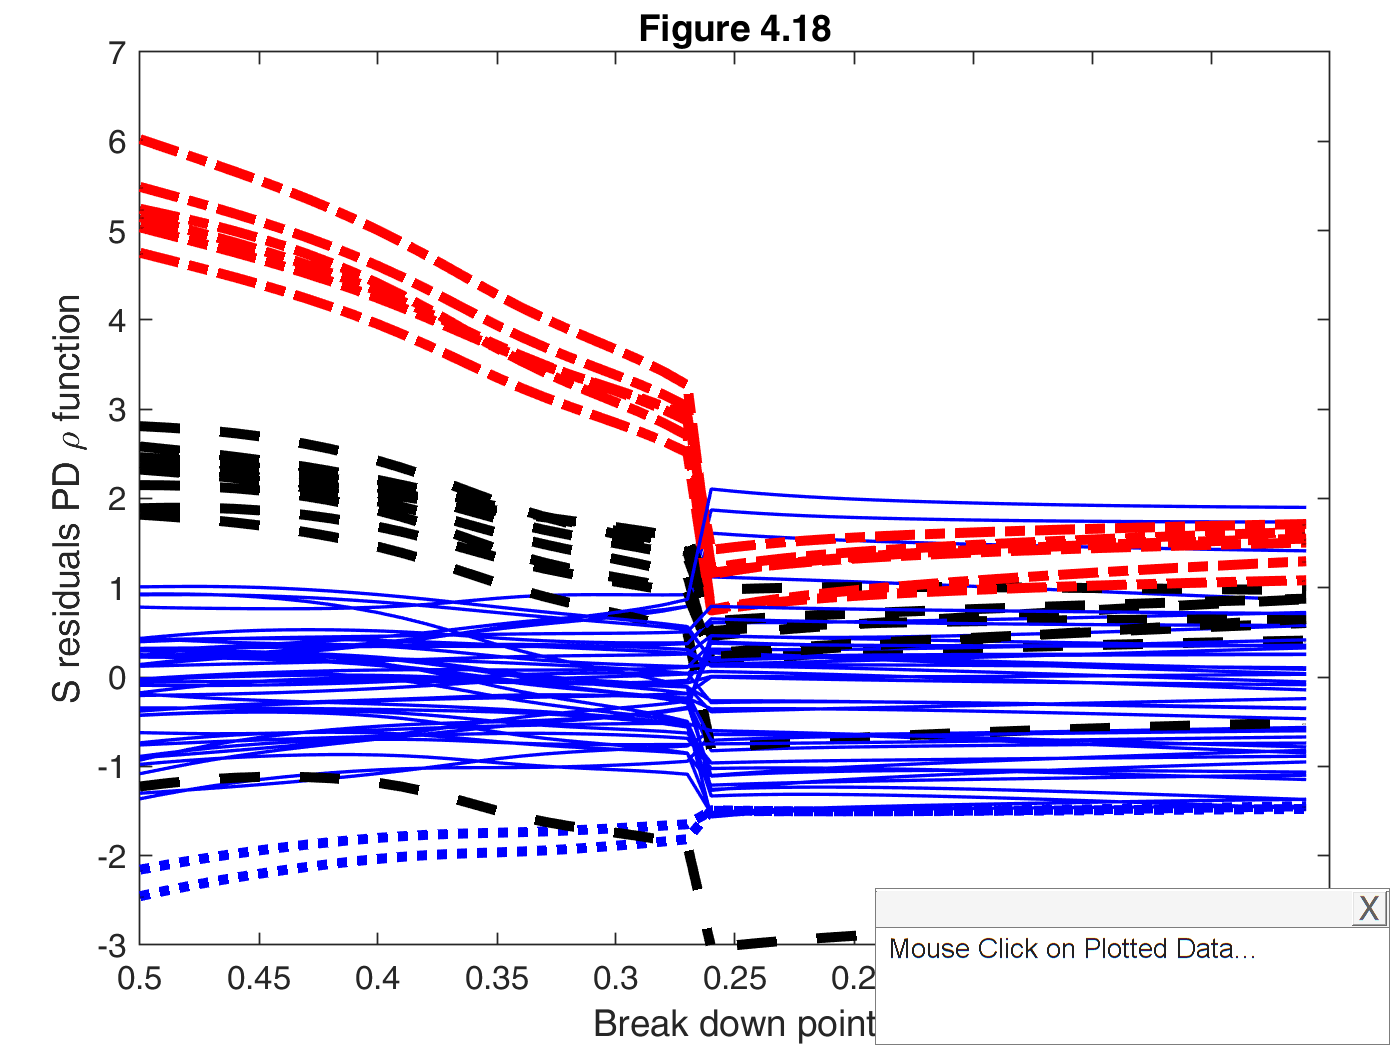

In [32]:
standard.laby='S residuals PD \rho function';
resfwdplot(outPD,'fground',fground,'tag','pl_PD', ...
    'corres',false,'standard',standard);
title('Figure 4.18')
set(gcf,"Name",'Figure 4.18')

In [33]:

if prin==1
    % print to postscript
    print -depsc ARmonPD.eps;
end

## Prepare input for Figures 4.19 and 4.20

In [34]:
bdp=0.5:-0.01:0.01;
RESLTS=zeros(n,length(bdp));
nsamp=20000;
RESLMS=zeros(n,length(bdp));

for j=1:length(bdp)
% Store LTS residuals
    [out]=LXS(y,X,'lms',2,'bdp',bdp(j),'nsamp',nsamp);
    RESLTS(:,j)=out.residuals;

    % Store LMS residuals
    [outLMS]=LXS(y,X,'bdp',bdp(j),'nsamp',nsamp);
    RESLMS(:,j)=outLMS.residuals;
end

Total estimated time to complete FASTLTS:  0.21 seconds 
Total estimated time to complete LMS:  0.06 seconds 
Total estimated time to complete FASTLTS:  0.07 seconds 
Total estimated time to complete LMS:  0.06 seconds 
Total estimated time to complete FASTLTS:  0.06 seconds 
Total estimated time to complete LMS:  0.06 seconds 
Total estimated time to complete FASTLTS:  0.06 seconds 
Total estimated time to complete LMS:  0.06 seconds 
Total estimated time to complete FASTLTS:  0.07 seconds 
Total estimated time to complete LMS:  0.06 seconds 
Total estimated time to complete FASTLTS:  0.06 seconds 
Total estimated time to complete LMS:  0.06 seconds 
Total estimated time to complete FASTLTS:  0.07 seconds 
Total estimated time to complete LMS:  0.10 seconds 
Total estimated time to complete FASTLTS:  0.07 seconds 
Total estimated time to complete LMS:  0.06 seconds 
Total estimated time to complete FASTLTS:  0.06 seconds 
Total estimated time to complete LMS:  0.17 seconds 
Total esti

In [35]:
outLTS=struct;
outLTS.RES=RESLTS;
outLTS.class='Sregeda';
outLTS.bdp=bdp;
outLTS.X=X;
outLTS.y=y;

outLMS=outLTS;
outLMS.RES=RESLMS;

## Create Figure 4.19


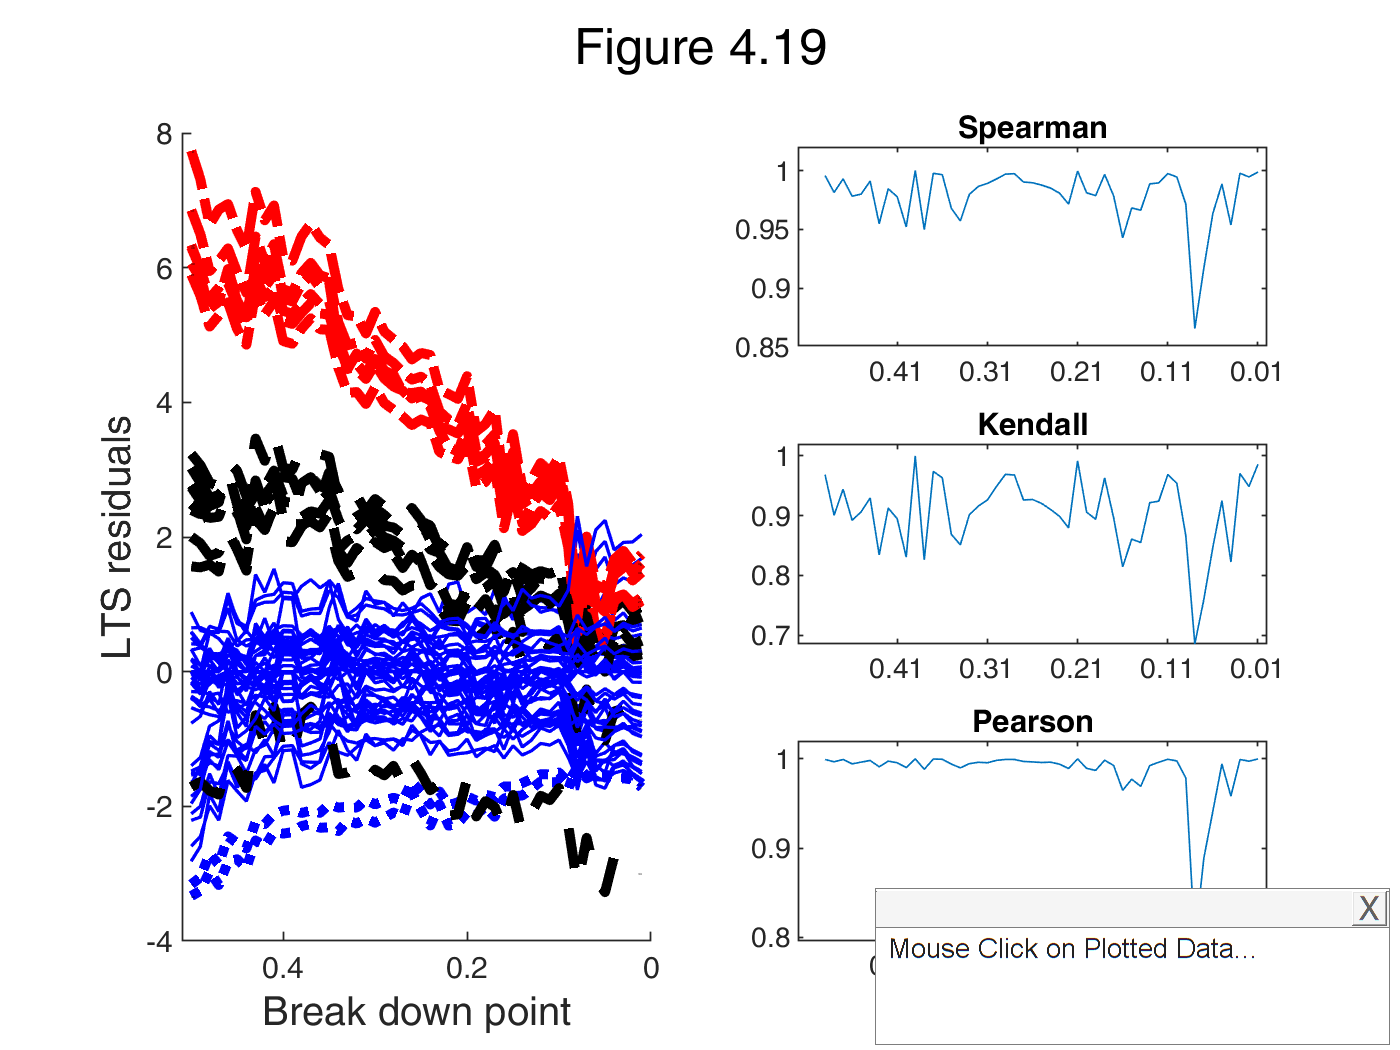

In [36]:
standard.laby='LTS residuals';
standard.ylim=[-4 8];
resfwdplot(outLTS,'fground',fground,'tag','pl_LTS', ...
    'corres',true,'standard',standard);
sgtitle('Figure 4.19')
set(gcf,"Name",'Figure 4.19')

## Create Figure 4.20


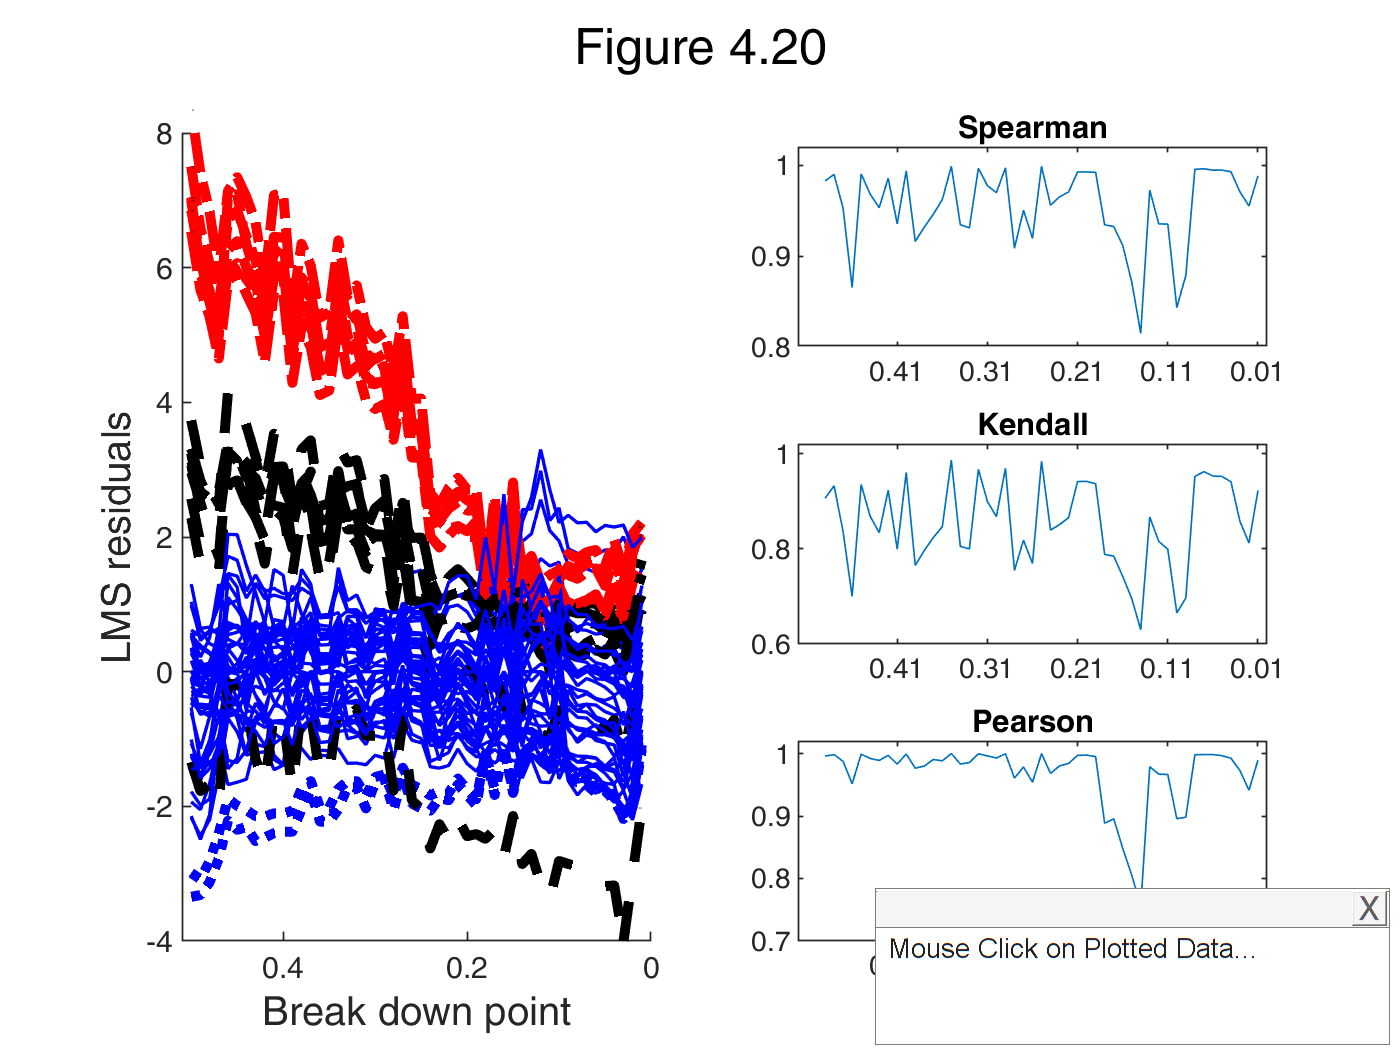

In [37]:
standard.laby='LMS residuals';
standard.ylim=[-4 8];
resfwdplot(outLMS,'fground',fground,'tag','pl_LMS', ...
    'corres',true,'standard',standard);
sgtitle('Figure 4.20')
set(gcf,"Name",'Figure 4.20')

## Create Figure 4.21

LMS using 10000 subsamples


In [38]:
[outLXS]=LXS(y,X,'nsamp',10000);

Total estimated time to complete LMS:  0.03 seconds


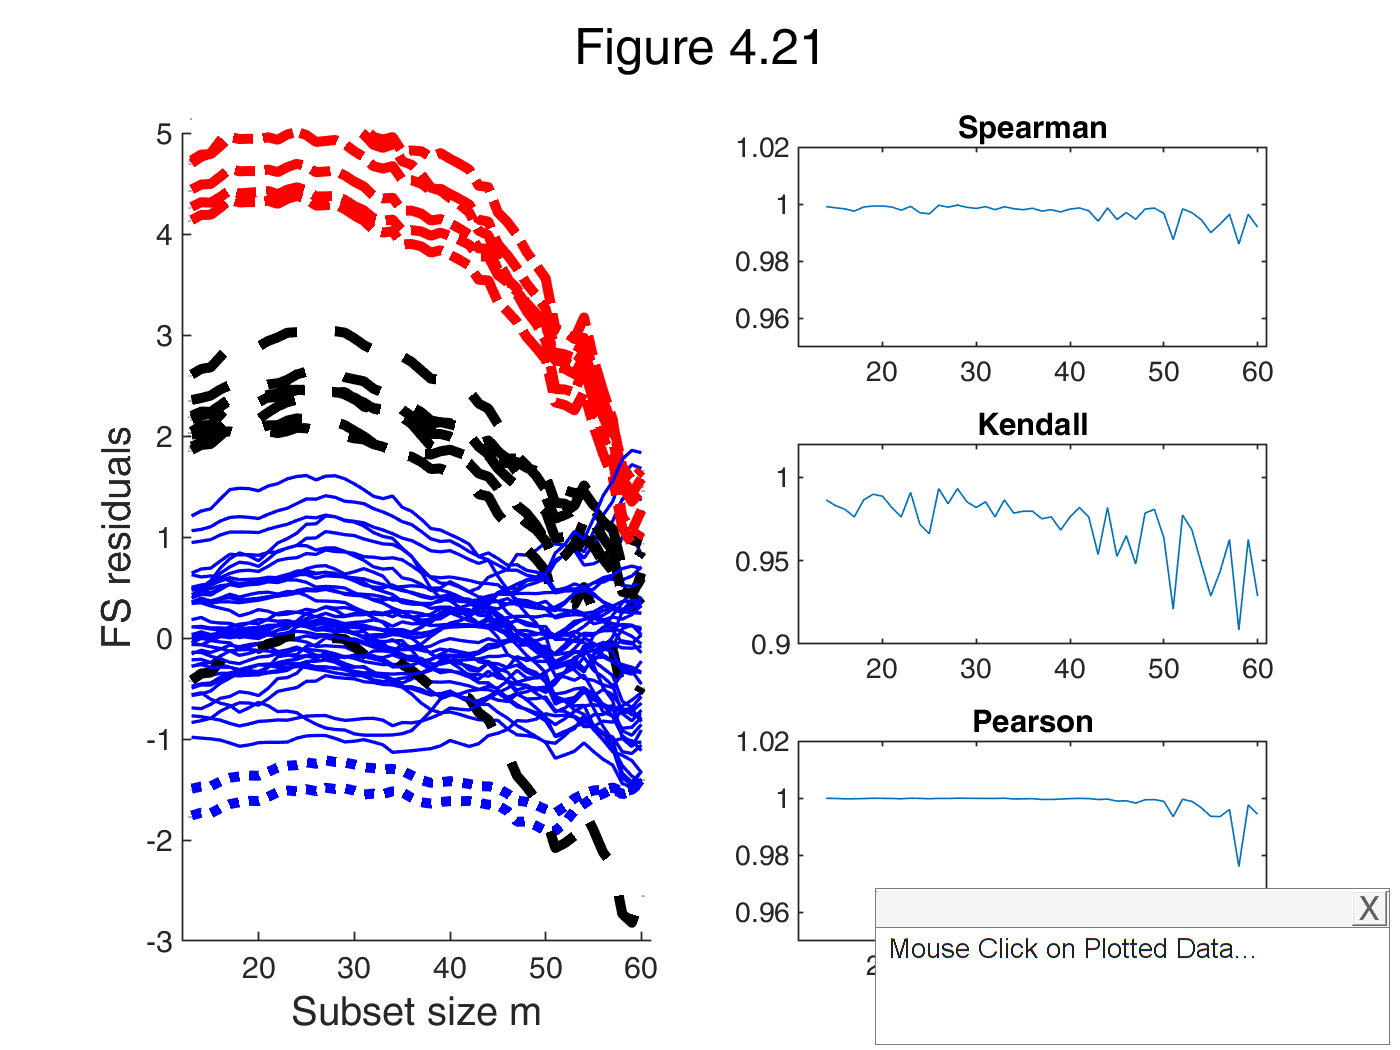

In [39]:
% Forward Search
[outFS]=FSReda(y,X,outLXS.bs);

standard.laby='FS residuals';
standard.ylim=[-3 5];
resfwdplot(outFS,'fground',fground,'tag','pl_FS', ...
    'corres',true,'standard',standard);
sgtitle('Figure 4.21')
set(gcf,"Name",'Figure 4.21')

## Create Figure 4.22

top panel



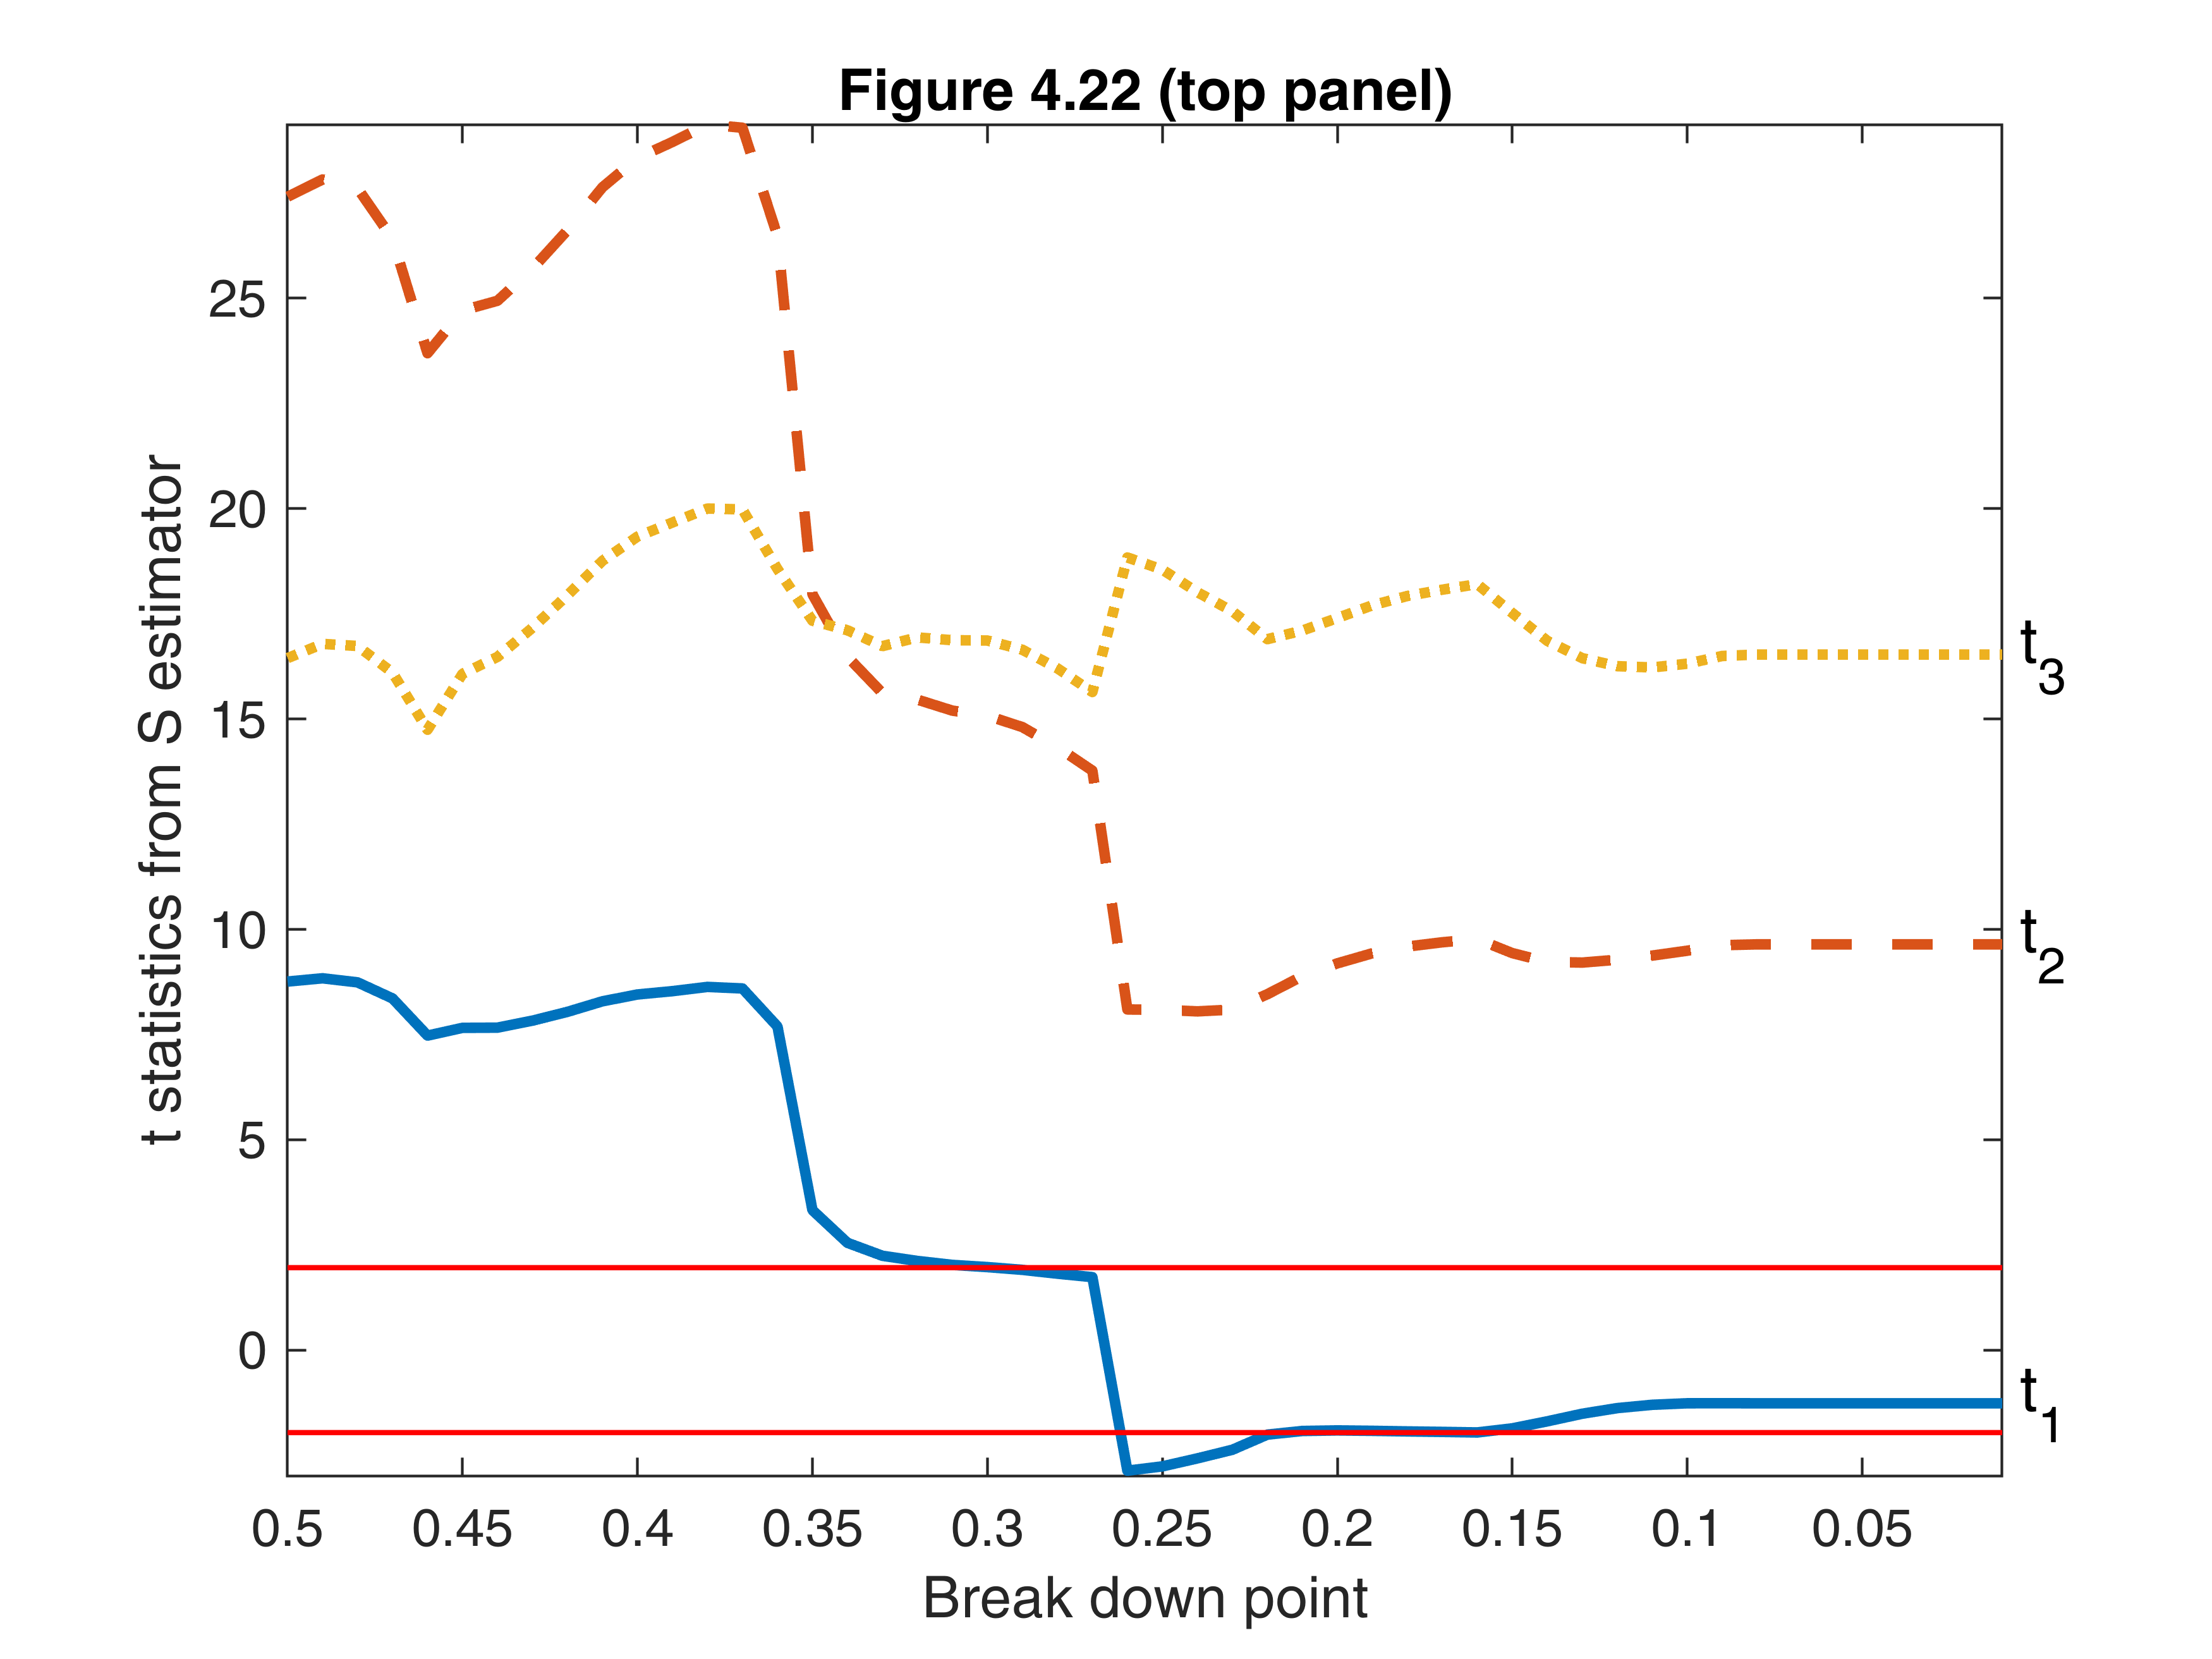

In [40]:
fanplotFS(outOPT,'conflev',0.95,'tag','plrobcopv0');
title('')
title('Figure 4.22 (top panel)')
set(gcf,"Name",'Figure 4.22 (top panel)')


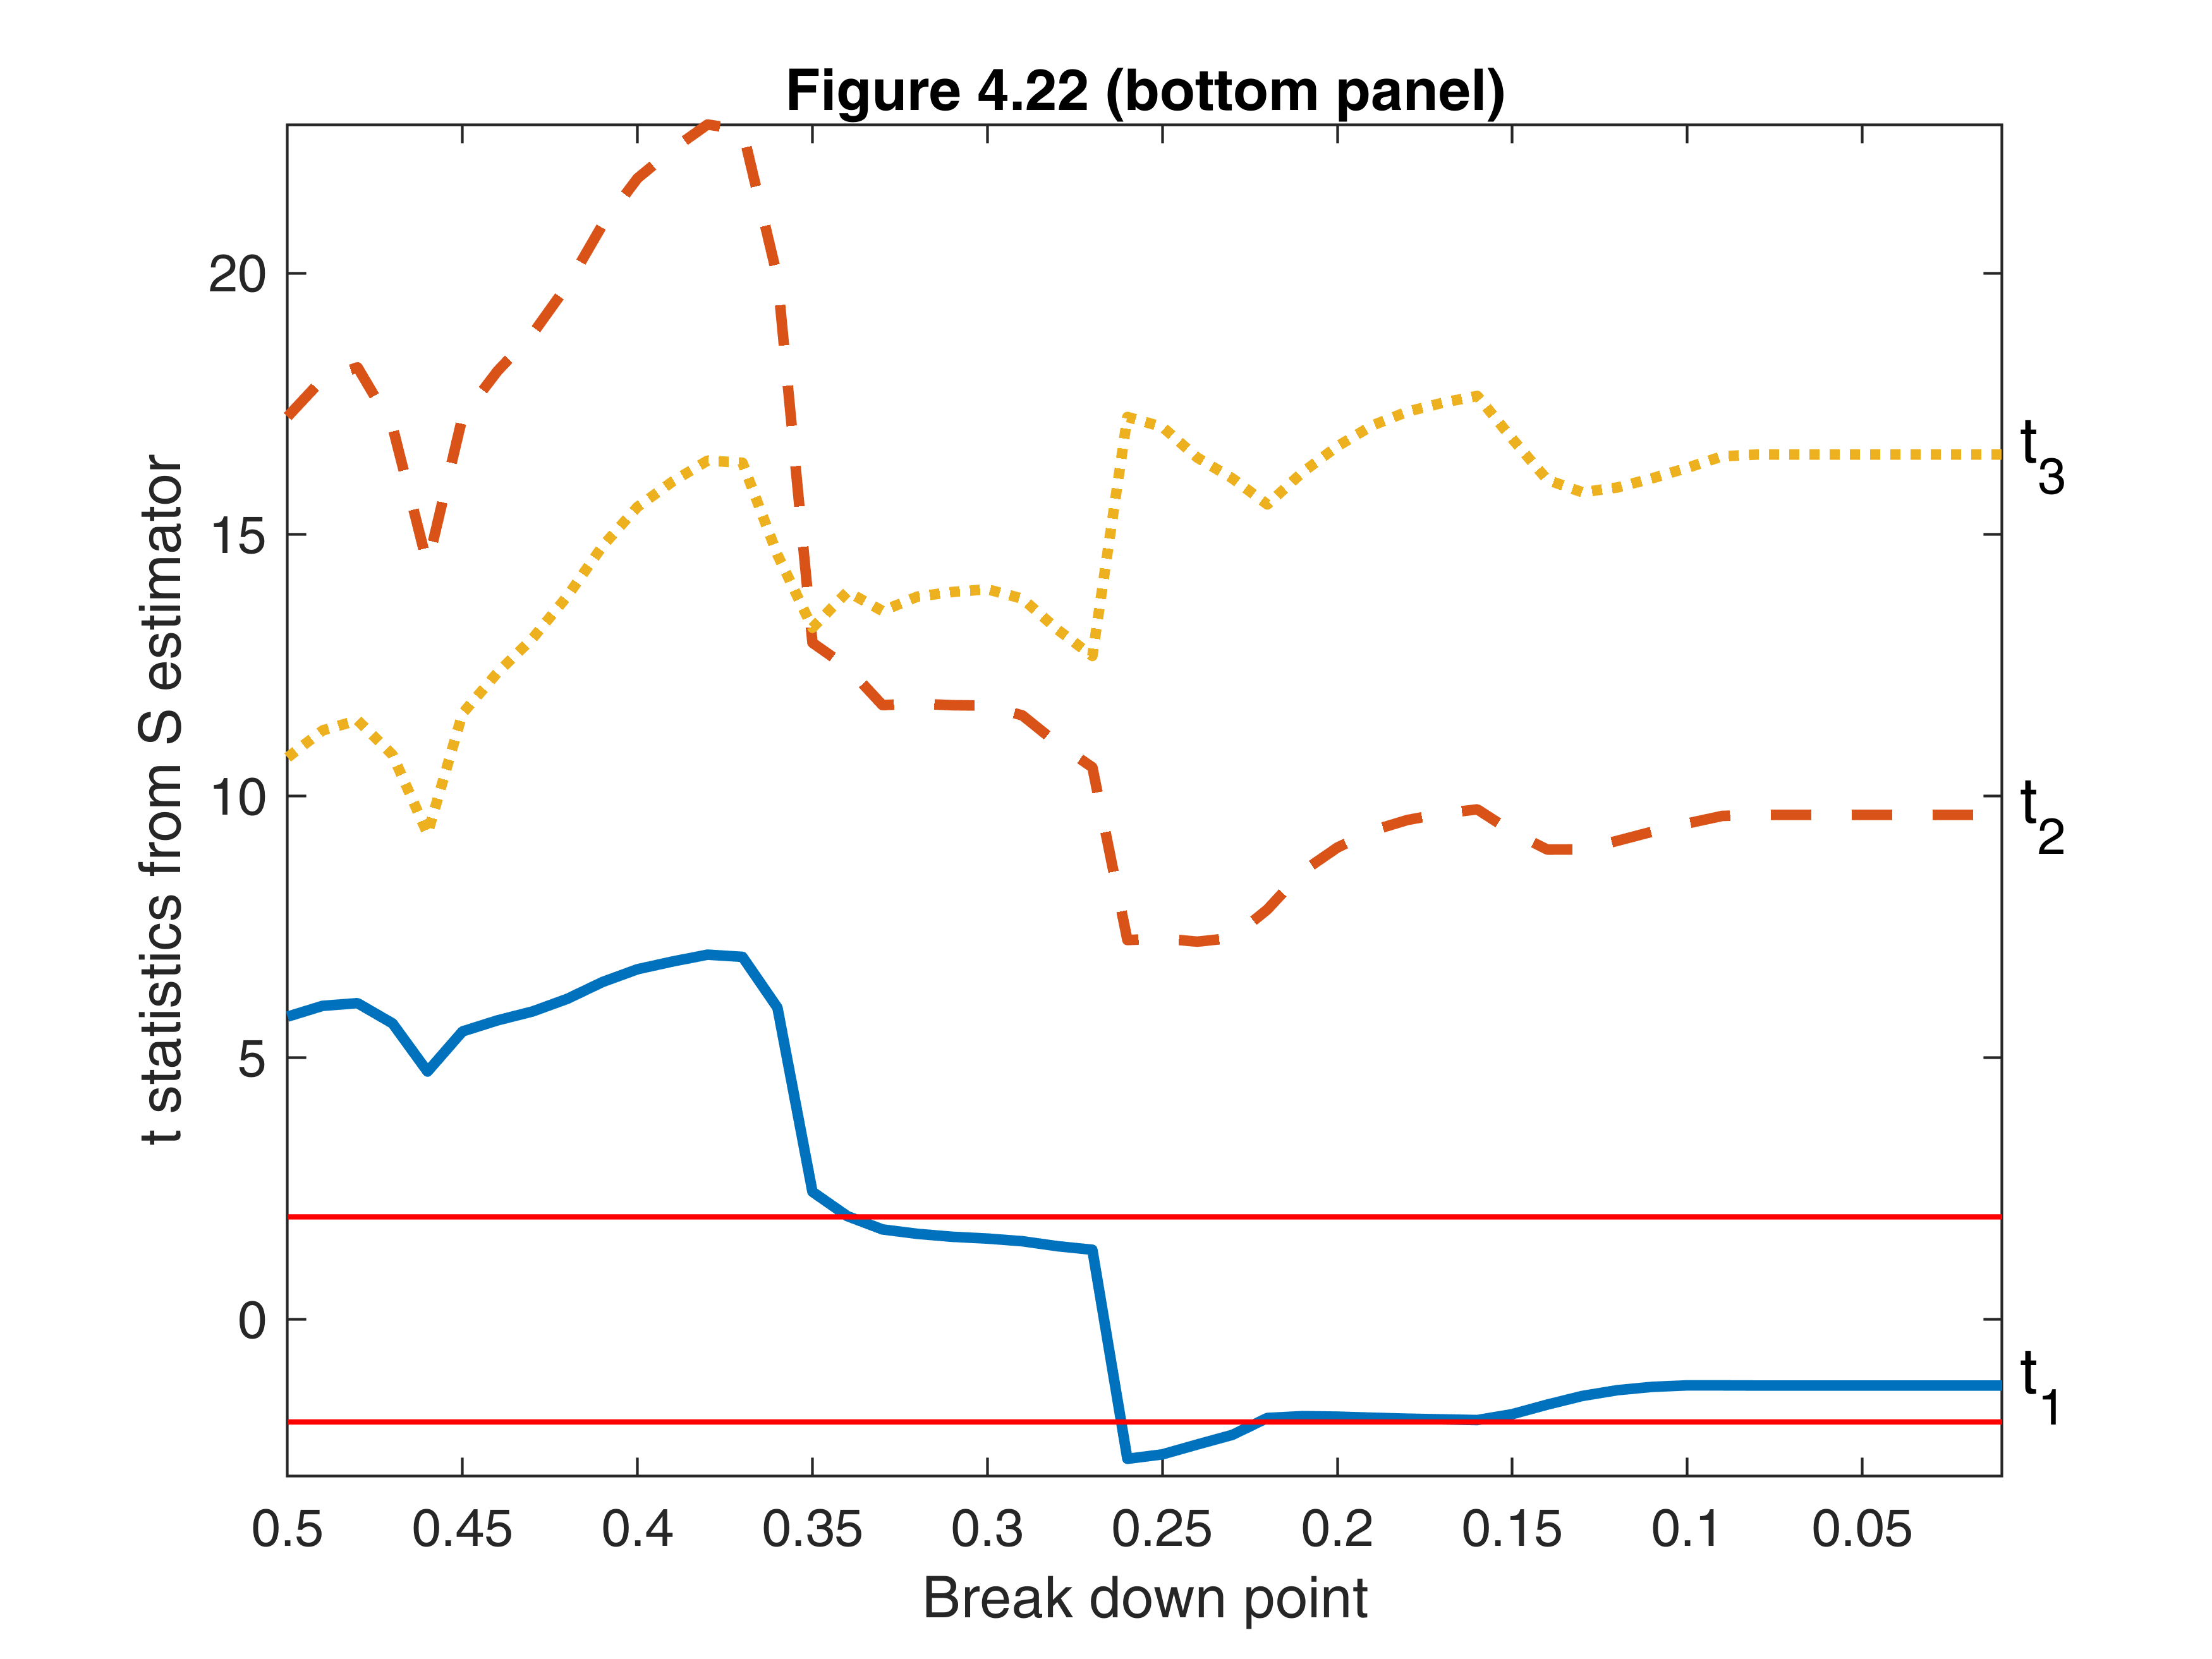

In [41]:

% bottom panel
fanplotFS(outOPT1,'conflev',0.95,'tag','plrobcopv1');
title('')
title('Figure 4.22 (bottom panel)')
set(gcf,"Name",'Figure 4.22 (bottom panel)')

In [42]:

if prin==1
    % print to postscript
    print -depsc StstatAR.eps;
end

%InsideREADME